<a href="https://colab.research.google.com/github/dariashulga/course_work1/blob/main/%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт необходимых библиотек

In [1]:
!pip3 install wbdata
import wbdata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
%matplotlib inline

**Исходные данные**

Для эмпирического анализа были использованы данные по экономике Дании, полученные через API всемирного банка (World Bank) с использованием библиотеки wbdata.

Wbdata – это простой интерфейс Python для поиска и запроса информации из
различных баз данных Всемирного банка (data.worldbank.org), как в виде словаря с
полными метаданными, так и в виде объекта Pandas DataFrame. В настоящее время
wbdata представляет собой оболочку для большей части API Всемирного банка , а также
добавляет ряд удобных функций для поиска и извлечения информации
(wbdata.readthedocs.io).

**Загрузка, очистка и предварительная обработка данных**

Перед тем как приступить к самому анализу данных, необходимо определить эмпирические аналоги теоретических переменных:

𝑌 = GDP (constant 2015 US$)

ВВП (Gross Domestic Product – GDP) представляет собой рыночную стоимость
всех конечных товаров и услуг, произведённых за год во всех отраслях экономики на территории определенной страны для потребления, экспорта и накопления, вне зависимости от национальной принадлежности использованных факторов производства.

𝐾 = GCF (constant 2015 US$)

(Gross capital formation – GCF), включает в себя затраты на накопление основного капитала, изменение запасов материальных оборотных средств, а также приобретение ценностей за вычетом их выбытия.

𝐿 = Labor force, total

Общая численность рабочей силы. Показатель отражает объем трудовых ресурсов, участвующих в производственном процессе.

In [2]:
indicators = {
    "NY.GDP.MKTP.KD": "gdp",
    "NE.GDI.TOTL.KD": "capital",
    "SL.TLF.TOTL.IN": "labor"
}

**Корректировка и первоначальный анализ**

Получаем данные по выбранным индикаторам и сортируем по году наблюдений.

In [3]:
print("Загрузка данных по Дании...")
data = wbdata.get_dataframe(indicators=indicators, country="DNK")
data = data.sort_index()
data

Загрузка данных по Дании...


,gdp,capital,labor
date,,,
1960,8.023806e+10,NaN,NaN
1961,8.535631e+10,NaN,NaN
1962,9.019331e+10,NaN,NaN
1963,9.076786e+10,NaN,NaN
1964,9.918198e+10,NaN,NaN
...,...,...,...
2020,3.261770e+11,7.477597e+10,3032016.0
2021,3.502556e+11,8.398894e+10,3079023.0
2022,3.556501e+11,8.818237e+10,3147518.0


Имеются незаполненные поля. Необходимо избавиться от них, так как в контексте нашей модели эти данные бесполезны, также, на всякий случай, удалим дупликаты, если они есть.

In [4]:
data = data.dropna()
data = data.drop_duplicates()
print(f"Размерность данных после очистки: {data.shape}")
data

Размерность данных после очистки: (35, 3)


,gdp,capital,labor
date,,,
1990,2.020738e+11,3.559904e+10,2869730.0
1991,2.050204e+11,3.421921e+10,2876655.0
1992,2.091676e+11,3.472950e+10,2879282.0
1993,2.090026e+11,3.199348e+10,2858653.0
1994,2.200686e+11,3.631754e+10,2780928.0
1995,2.267544e+11,4.161109e+10,2820861.0
1996,2.333206e+11,4.205044e+10,2834685.0
1997,2.407133e+11,4.806900e+10,2851413.0
1998,2.463130e+11,5.093120e+10,2837498.0


В результате процедуры очистки данных были удалены пропущенные значения и дублирующиеся наблюдения.
Итоговый набор данных содержит 35 ежегодных наблюдений за период с 1990 по 2024 год, что обеспечивает
достаточный объем информации для построения регрессионной модели.

Для удобства последующего анализа и визуализации проведена нормализация показателей относительно
базового 1990 года.

Нормализация осуществляется по формуле:

$$ X_{norm} = \frac{X_{t}}{X_{0}} ⋅ 100 $$

где:

$X_{norm}$ – нормализированное значение показателя

$X_{t}$ – значение показателя в году 𝑡

$X_{0}$ – значение в базовом году

Формула для обратного преобразования:

$$ X_{t} = X_{norm} ⋅ \frac{X_{0}}{100} $$

Данная процедура позволяет привести разноразмерные показатели к сопоставимому виду и анализировать
относительную динамику изменения факторов производства.

In [5]:
data = data.reset_index().rename(columns={'date': 'year'})
base_date = data['year'].loc[0]
base_gdp = data['gdp'].loc[0]
base_capital = data['capital'].loc[0]
base_labor = data['labor'].loc[0]

In [6]:
data['gdp_norm'] = data['gdp'] / base_gdp * 100
data['capital_norm'] = data['capital'] / base_capital * 100
data['labor_norm'] = data['labor'] / base_labor * 100
print("Первые 5 строк нормализованных данных:")
data.head()

Первые 5 строк нормализованных данных:


,year,gdp,capital,labor,gdp_norm,capital_norm,labor_norm
0,1990,2.020738e+11,3.559904e+10,2869730.0,100.000000,100.000000,100.000000
1,1991,2.050204e+11,3.421921e+10,2876655.0,101.458180,96.123968,100.241312
2,1992,2.091676e+11,3.472950e+10,2879282.0,103.510488,97.557424,100.332854
3,1993,2.090026e+11,3.199348e+10,2858653.0,103.428817,89.871762,99.614005
4,1994,2.200686e+11,3.631754e+10,2780928.0,108.905059,102.018317,96.905563


In [7]:
print("\n" + "="*60)
print("ВОССТАНОВЛЕНИЕ АБСОЛЮТНЫХ ЗНАЧЕНИЙ ДЛЯ АНАЛИЗА")
print("="*60)

# Получим абсолютные значения обратно из нормализованных
absolute_gdp = data['gdp_norm'] * base_gdp / 100
absolute_capital = data['capital_norm'] * base_capital / 100
absolute_labor = data['labor_norm'] * base_labor / 100

print(f"Базовые значения (абсолютные):")
print(f"Base GDP: {base_gdp/1e9:.2f} млрд. $")
print(f"Base Capital: {base_capital/1e9:.2f} млрд. $")
print(f"Base Labor: {base_labor/1e6:.2f} млн. человек")

# Добавляем абсолютные значения в DataFrame для дальнейшего использования
data['gdp_absolute'] = absolute_gdp
data['capital_absolute'] = absolute_capital
data['labor_absolute'] = absolute_labor

print(" Абсолютные значения восстановлены и добавлены в DataFrame")
print(f" Диапазон абсолютного ВВП: {absolute_gdp.min()/1e9:.1f} - {absolute_gdp.max()/1e9:.1f} млрд. $")


ВОССТАНОВЛЕНИЕ АБСОЛЮТНЫХ ЗНАЧЕНИЙ ДЛЯ АНАЛИЗА
Базовые значения (абсолютные):
Base GDP: 202.07 млрд. $
Base Capital: 35.60 млрд. $
Base Labor: 2.87 млн. человек
 Абсолютные значения восстановлены и добавлены в DataFrame
 Диапазон абсолютного ВВП: 202.1 - 377.9 млрд. $


In [8]:
# Рассчитываем описательную статистику для наших данных
import numpy as np

# Создаем копию данных для расчетов
stats_data = data.copy()

# Переводим в удобные единицы измерения
stats_data['gdp_bln'] = stats_data['gdp'] / 1e9  # млрд. долларов
stats_data['capital_bln'] = stats_data['capital'] / 1e9  # млрд. долларов
stats_data['labor_mln'] = stats_data['labor'] / 1e6  # млн. человек

descriptive_stats = stats_data[['gdp_bln', 'capital_bln', 'labor_mln']].describe()

print("ОПИСАТЕЛЬНАЯ СТАТИСТИКА ДЛЯ ТАБЛИЦЫ 1.2:")
print("="*50)
print(descriptive_stats)

print("\n" + "="*60)
print("ДАННЫЕ ДЛЯ ТАБЛИЦЫ 1.2:")
print("="*60)

print(f"ВВП: среднее = {stats_data['gdp_bln'].mean():.1f} млрд.$, "
      f"ст.отклонение = {stats_data['gdp_bln'].std():.1f}, "
      f"min = {stats_data['gdp_bln'].min():.1f}, max = {stats_data['gdp_bln'].max():.1f}")

print(f"Капитал: среднее = {stats_data['capital_bln'].mean():.1f} млрд.$, "
      f"ст.отклонение = {stats_data['capital_bln'].std():.1f}, "
      f"min = {stats_data['capital_bln'].min():.1f}, max = {stats_data['capital_bln'].max():.1f}")

print(f"Труд: среднее = {stats_data['labor_mln'].mean():.2f} млн.чел., "
      f"ст.отклонение = {stats_data['labor_mln'].std():.2f}, "
      f"min = {stats_data['labor_mln'].min():.2f}, max = {stats_data['labor_mln'].max():.2f}")

ОПИСАТЕЛЬНАЯ СТАТИСТИКА ДЛЯ ТАБЛИЦЫ 1.2:
          gdp_bln  capital_bln  labor_mln
count   35.000000    35.000000  35.000000
mean   281.211132    57.132362   2.924296
std     46.376581    14.478661   0.101519
min    202.073830    31.993482   2.780928
25%    249.967467    49.425791   2.865425
50%    284.093791    54.335929   2.892968
75%    306.395517    67.642091   2.938608
max    377.924893    88.182367   3.210383

ДАННЫЕ ДЛЯ ТАБЛИЦЫ 1.2:
ВВП: среднее = 281.2 млрд.$, ст.отклонение = 46.4, min = 202.1, max = 377.9
Капитал: среднее = 57.1 млрд.$, ст.отклонение = 14.5, min = 32.0, max = 88.2
Труд: среднее = 2.92 млн.чел., ст.отклонение = 0.10, min = 2.78, max = 3.21


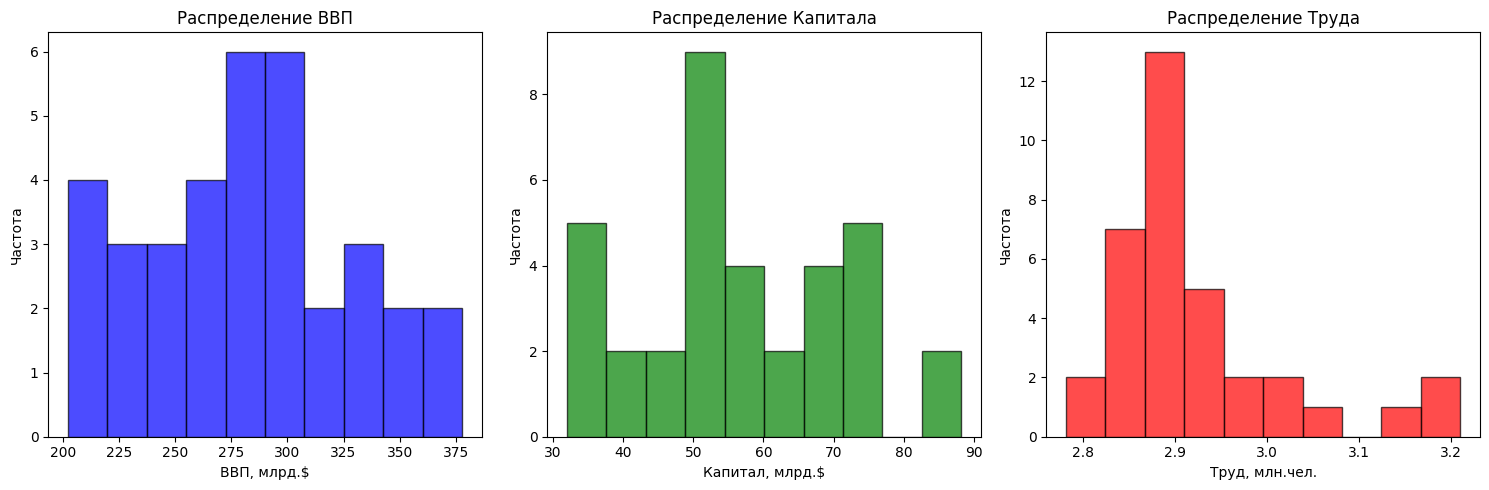

In [9]:
# График распределений
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(stats_data['gdp_bln'], bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title('Распределение ВВП')
plt.xlabel('ВВП, млрд.$')
plt.ylabel('Частота')

plt.subplot(1, 3, 2)
plt.hist(stats_data['capital_bln'], bins=10, alpha=0.7, color='green', edgecolor='black')
plt.title('Распределение Капитала')
plt.xlabel('Капитал, млрд.$')
plt.ylabel('Частота')

plt.subplot(1, 3, 3)
plt.hist(stats_data['labor_mln'], bins=10, alpha=0.7, color='red', edgecolor='black')
plt.title('Распределение Труда')
plt.xlabel('Труд, млн.чел.')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

**Производственная функция Кобба-Дугласа**

Стандартным определением функции Кобба-Дугласа является:

$$Y = A \cdot K^\alpha \cdot L^\beta$$

Где 𝑌 — общий объем производства (денежная стоимость всех товаров, произведенных за год).

𝐴 — производственный коэффициент.

𝐾 — капитал (денежная стоимость всего оборудования)

𝐿 — труд (количество человеко-часов в год)

𝛼, 𝛽 — коэффициенты эластичности объема производства по затратам капитала и труда.

Коэффициенты эластичности 𝛼, 𝛽 показывают, на сколько процентов изменится объем выпуска 𝑌 при увеличении соотвествующего фактора производства (капитала 𝐾 или труда 𝐿) на 1%. Например, если 𝛼 = 0,15, то увеличение затрат капитала на 1% приведет к росту выпуска примерно на 0,15%. Аналогично, если 𝛽 = 0,31, то увеличение труда на 1% вызовет рост выпуска на 0,31%.

Одним из важных свойств функции является сумма коэффициентов эластичности (𝛼 + 𝛽).

Если 𝛼 + 𝛽 = 1, то функция Кобба–Дугласа является линейно однородной, то
есть она демонстрирует постоянную отдачу при изменении масштабов производства. Так, например, если 𝐿 и 𝐾 увеличить на 20%, то и 𝑌 увеличится на 20%.

Если 𝛼 + 𝛽 > 1, функция отражает возрастающую отдачу.

Если 𝛼 + 𝛽 < 1 – убывающую.

Для эмпирической оценки параметров функции Кобба-Дугласа на реальных данных используется логарифмическая форма уравнения:

$$ \ln (Y) = \ln (A) + \alpha \ln (K) + \beta \ln (L) $$

Данная форма удобна тем, что является линеной относительно логарифмов, а потому допускает использование методов линейной регрессии для нахождения коэффициентов 𝛼 и 𝛽.

Особенности для экономики Дании:
- Высокий уровень технологического развития
- Значительный вклад человеческого капитала
- Сильная социальная ориентация экономики





 ПОСТРОЕНИЕ МОДЕЛИ
Постановка задачи линейной регрессии

Для эмпирической оценки параметров производственной функции Кобба-Дугласа преобразуем нелинейную модель в линейную форму с помощью логарифмирования:

$$ \ln (Y) = \ln (A) + \alpha \ln (K) + \beta \ln (L) $$

Задача состоит в оценке неизвестных параметров

A,α и β по имеющимся статистическим данным.

Формализуем задачу линейной регрессии. Пусть имеется обучающая выборка $D=(x_i, y_i)_{i=1}^n,  x_i \in \mathbb{R^2}, y_i \in \mathbb{R}$

где:

 $y_i = \ln Y_i$ - целевая переменная (логарифм выпуска),

 $x_i = (\ln K_i, \ln L_i)^T$ - вектор признаков.


Линейная модель регрессии имеет вид:

$$ a(\tilde x,w)=\left\langle \tilde x, w\right\rangle = \displaystyle\sum\limits_{j=0}^{2} \tilde x_j\, w_j $$

где:

$$\tilde x=\begin{pmatrix} \tilde x_0\\ \tilde x_1\\ \tilde x_2 \end{pmatrix} =\begin{pmatrix} 1\\ \ln K\\ \ln L \end{pmatrix} - \qquad$$ расширенный вектор признаков,

а,

$$w=\begin{pmatrix} w_0\\ w_1\\ w_2 \end{pmatrix} =\begin{pmatrix} \ln A\\ \alpha\\ \beta \end{pmatrix} - \qquad$$ вектор оцениваемых параметров.


В качестве функции потерь используется среднеквадратичная ошибка:

$$\mathcal{L}(𝑎,𝑦) = (𝑎-𝑦)^2$$

Метод наименьших квадратов минимизирует сумму квадратов отклонений:

$$𝑄(𝑤) = \sum_{i=1}^{l}\bigl(a(\tilde x_i,w)-y_i\bigr)^2 \;\rightarrow\; \min_{w}$$

Данная оптимизационная задача эффективно решается с использованием класса LinearRegression библиотеки scikit-learn.



 Подготовка данных для регрессии

In [13]:
data['log_gdp'] = np.log(data['gdp'])
data['log_capital'] = np.log(data['capital'])
data['log_labor'] = np.log(data['labor'])
X = np.column_stack((np.ones(len(data)), data['log_capital'].values, data['log_labor'].values))
y = data['log_gdp'].values

 Построение линейной регрессии

In [14]:
X = np.column_stack((np.ones(len(data)), data['log_capital'].values, data['log_labor'].values))
y = data['log_gdp'].values

model = sm.OLS(y, X)
results = model.fit()

 Извлечение параметров

In [15]:
lnA, alpha, beta = results.params
A = np.exp(lnA)

print("="*60)
print("РЕЗУЛЬТАТЫ ОЦЕНКИ ПАРАМЕТРОВ ДЛЯ ДАНИИ")
print("="*60)
print(f"A = {A:.6f}")
print(f"α (эластичность по капиталу) = {alpha:.6f}")
print(f"β (эластичность по труду) = {beta:.6f}")
print(f"α + β (отдача от масштаба) = {alpha + beta:.6f}")

# Анализ отдачи от масштаба
if alpha + beta > 1:
    scale_effect = "ВОЗРАСТАЮЩАЯ"
elif alpha + beta < 1:
    scale_effect = "УБЫВАЮЩАЯ"
else:
    scale_effect = "ПОСТОЯННАЯ"

print(f"Отдача от масштаба: {scale_effect}")

РЕЗУЛЬТАТЫ ОЦЕНКИ ПАРАМЕТРОВ ДЛЯ ДАНИИ
A = 1.064823
α (эластичность по капиталу) = 0.523908
β (эластичность по труду) = 0.895139
α + β (отдача от масштаба) = 1.419047
Отдача от масштаба: ВОЗРАСТАЮЩАЯ


 Детальная статистика модели

In [16]:
print("\n" + "="*60)
print("ДЕТАЛЬНАЯ СТАТИСТИКА МОДЕЛИ")
print("="*60)
print(results.summary())


ДЕТАЛЬНАЯ СТАТИСТИКА МОДЕЛИ
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     265.6
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           1.18e-20
Time:                        07:18:44   Log-Likelihood:                 63.483
No. Observations:                  35   AIC:                            -121.0
Df Residuals:                      32   BIC:                            -116.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0628  

Коэффициент детерминации R² = 0,943 свидетельствует о том, что модель объясняет 94,3% вариации логарифма ВВП Дании. Такой высокий показатель может указывать на хорошее соответствие модели эмпирическим данным, однако требует дополнительной проверки на переобучение.

F-статистика = 265,6 при p-value = 1,18×10⁻²⁰ позволяет уверенно отвергнуть нулевую гипотезу о равенстве нулю всех коэффициентов регрессии (кроме константы). Модель в целом является статистически значимой на любом reasonable уровне значимости.

Статистическая значимость параметров

Анализ t-статистик и p-values для отдельных коэффициентов показывает:

•	Константа (lnA): p-value = 0,988 > 0,05 → коэффициент статистически не значим. Это может свидетельствовать о том, что технологический параметр A не оказывает существенного независимого влияния в рамках данной спецификации модели.

•	Коэффициент при капитале (α): p-value = 0,000 < 0,01 → коэффициент высоко значим на 1% уровне значимости.

•	Коэффициент при труде (β): p-value = 0,009 < 0,01 → коэффициент значим на 1% уровне значимости.

Доверительные интервалы для значимых коэффициентов не включают ноль, что дополнительно подтверждает их статистическую значимость.

Диагностика нарушений предпосылок МНК

Тест Дарбина-Уотсона: значение статистики 0,628 указывает на наличие положительной автокорреляции остатков. Это нарушает предположение о независимости ошибок регрессии.

Число обусловленности: 1,68×10⁴ значительно превышает пороговое значение 1000, что свидетельствует о проблеме мультиколлинеарности. Высокая корреляция между факторами производства (капиталом и трудом) затрудняет точное оценивание их индивидуального вклада в выпуск.

При интерпретации результатов следует учитывать два методологических ограничения:

1. Наличие положительной автокорреляции остатков (Durbin-Watson = 0.628)
   может приводить к завышению статистической значимости коэффициентов.

2. Высокая мультиколлинеарность между факторами производства (Condition Number = 1.68×10⁴)
   затрудняет точную оценку индивидуального вклада капитала и труда в экономический рост.

Несмотря на указанные ограничения, модель демонстрирует высокую объясняющую способность
и может быть использована для анализа общих тенденций в экономике Дании.






Проверка нормальности распределения данных

В рамках проверки статистических предпосылок регрессионного анализа проведена комплексная проверка нормальности распределения исследуемых переменных с использованием трех критериев: Шапиро-Уилка (для малых выборок), Д'Агостино (основанный на моментах распределения) и Андерсона-Дарлинга (интегральный критерий). Уровень значимости принят равным 0.05.

Результаты тестирования выявили неоднородную картину:

ВВП и капитал (как в абсолютных, так и в нормализованных значениях) не показывают статистически значимых отклонений от нормального распределения (p-value теста Шапиро-Уилка: 0.5539 и 0.5289 соответственно). Значения асимметрии близки к нулю (0.0939 и 0.1301), а эксцесс отрицательный, что свидетельствует о легкой платикуртичности распределений.

Логарифмирование переменных ВВП и капитала сохраняет соответствие нормальному распределению (p-value теста Шапиро-Уилка: 0.3753 и 0.2255 соответственно), при этом асимметрия становится отрицательной (-0.2384 и -0.3784), что улучшает свойства распределений для регрессионного анализа.

Трудовые ресурсы демонстрируют значимое отклонение от нормальности во всех формах представления данных. В абсолютных значениях распределение характеризуется выраженной положительной асимметрией (1.4786) и положительным эксцессом (1.5179). Даже после логарифмирования распределение log(Труда) сохраняет значимые отклонения от нормального (p-value теста Шапиро-Уилка: 0.0001). Это отражает специфику динамики рынка труда Дании с периодами стабильности и резкими изменениями в отдельные годы.

Распределение остатков регрессионной модели [здесь вставить результаты после исправления кода] является важным индикатором качества спецификации модели. Нормальность остатков обеспечивает состоятельность стандартных ошибок и надежность статистических выводов.

Методологические последствия: Выявленное отклонение от нормальности распределения переменной 'Труд' требует осторожности при интерпретации t-статистик и доверительных интервалов для соответствующего коэффициента в регрессионной модели. Однако оценка методом наименьших квадратов остается состоятельной и несмещенной даже при отклонениях от нормальности, хотя эффективность оценок может снижаться.

 ВИЗУАЛИЗАЦИЯ ДАННЫХ

     Динамика показателей

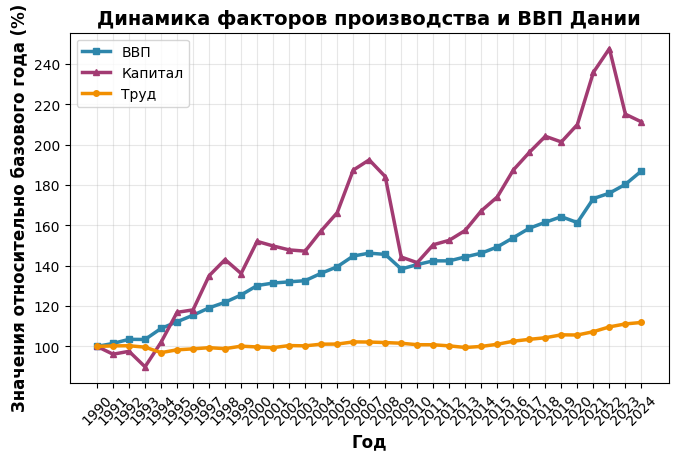

In [22]:
plt.figure(figsize=(17, 10))

plt.subplot(2, 2, 1)
plt.plot(data['year'], data['gdp_norm'], label='ВВП', linewidth=2.5, marker='s', markersize=4, color='#2E86AB')
plt.plot(data['year'], data['capital_norm'], label='Капитал', linewidth=2.5, marker='^', markersize=4, color='#A23B72')
plt.plot(data['year'], data['labor_norm'], label='Труд', linewidth=2.5, marker='o', markersize=4, color='#F18F01')
plt.xlabel('Год', fontsize=12, fontweight='bold')
plt.ylabel('Значения относительно базового года (%)', fontsize=12, fontweight='bold')
plt.title('Динамика факторов производства и ВВП Дании', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.show()

 Корреляционная матрица

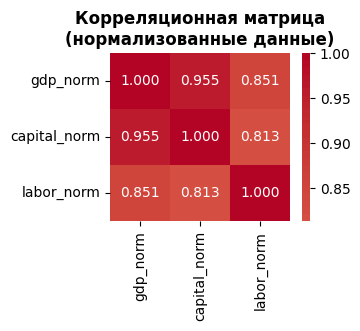

In [23]:
plt.subplot(2, 2, 2)
corr_matrix = data[['gdp_norm', 'capital_norm', 'labor_norm']].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0)
plt.title('Корреляционная матрица\n(нормализованные данные)', fontsize=12, fontweight='bold')
plt.show()

На графике динамики факторов производства и ВВП Дании за 1990-2024 годы наблюдаются следующие тенденции:

1. СТАБИЛЬНЫЙ РОСТ ВВП:
   - ВВП вырос с 100% в 1990 году до ~187% в 2024 году
   - Рост составил примерно 87% за 34 года
   - Среднегодовой темп роста: около 2.5%

2. ОПЕРЕЖАЮЩИЙ РОСТ КАПИТАЛА:
   - Капитал вырос с 100% до ~248% (рост 148%)
   - Темпы роста капитала значительно превышают рост ВВП
   - Наблюдаются существенные колебания в отдельные годы

3. УМЕРЕННЫЙ РОСТ ТРУДОВЫХ РЕСУРСОВ:
   - Труд вырос с 100% до ~112% (рост всего 12%)
   - Наименее изменчивый показатель
   - Относительная стабильность свидетельствует о зрелости рынка труда

4. КЛЮЧЕВЫЕ ВЫВОДЫ:
   - Рост ВВП в большей степени обусловлен накоплением капитала, чем увеличением труда
   - Экономика демонстрирует признаки капиталоемкого развития
   - Необходима дальнейшая оценка эластичности факторов производства
   
Видим, что корреляция между капиталом и рабочей силой 81,3%, что свидетельствует о сильной мультиколлинеарности, т.е, что один из факторов производства можно выразить как линейную комбинацию остальных, а в нашем же случае, нарушается предположение о том, что 𝐾 и 𝐿 независимые факторы, что является критическим допущением при использовании модели Кобба-Дугласа, а потому все наши дальнейшие оценки будут не очень надежными.

 Распределение показателей

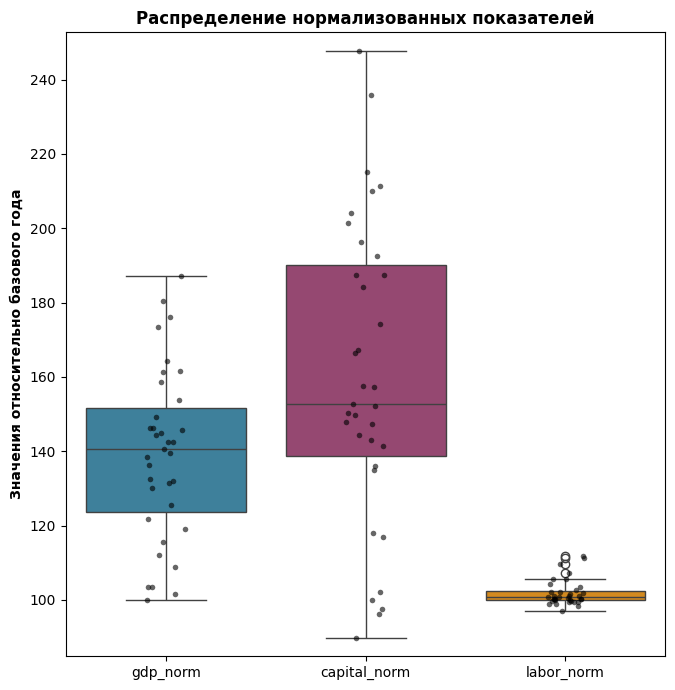

In [24]:

plt.figure(figsize=(13, 7))
plt.subplot(1, 2, 2)
box_data = data[['gdp_norm', 'capital_norm', 'labor_norm']]

sns.boxplot(data=box_data, palette=['#2E86AB', '#A23B72', '#F18F01'])
sns.stripplot(data=box_data, color="black", alpha=0.6, size=4)

plt.ylim(box_data.min().min() - 5, box_data.max().max() + 5)

plt.title('Распределение нормализованных показателей', fontweight='bold')
plt.ylabel('Значения относительно базового года', fontweight='bold')

plt.tight_layout()
plt.show()

Анализ распределения нормализованных показателей выявил интересную особенность:
трудовые ресурсы (labor_norm) демонстрируют исключительную стабильность на протяжении
всего исследуемого периода. Незначительные колебания численности рабочей силы
свидетельствуют о зрелости рынка труда
Дании и устойчивой демографической ситуации. В то же время, капитал и ВВП
показывают существенный рост, что указывает на интенсивный характер экономического
развития страны.



построим графики для лучшего представления

Ничего не поменялось, успех



#  Основные экономико-математические характеристики производственной функции

 ЭКОНОМИКО-МАТЕМАТИЧЕСКИЙ АНАЛИЗ

In [28]:
# Расчет характеристик для последнего года
last_year = data.iloc[-1]
Y = last_year['gdp']
K = last_year['capital']
L = last_year['labor']

# Основные показатели
APK = Y / K  # Средняя производительность капитала
APL = Y / L  # Средняя производительность труда
MPK = alpha * (Y / K)  # Предельная производительность капитала
MPL = beta * (Y / L)   # Предельная производительность труда
MRTS = MPL / MPK       # Предельная норма технического замещения

print("\n" + "="*60)
print("ЭКОНОМИКО-МАТЕМАТИЧЕСКИЕ ХАРАКТЕРИСТИКИ")
print("="*60)
print(f"Средняя производительность капитала (APK): {APK:.6f}")
print(f"Средняя производительность труда (APL): {APL:.4f}")
print(f"Предельная производительность капитала (MPK): {MPK:.6f}")
print(f"Предельная производительность труда (MPL): {MPL:.4f}")
print(f"Предельная норма технического замещения (MRTS): {MRTS:.4f}")
print(f"Эластичность замещения: 1.000 (постоянная для функции Кобба-Дугласа)")

print("\nЭКОНОМИЧЕСКАЯ ИНТЕРПРЕТАЦИЯ ПОСЛЕДНЕГО ГОДА:")
print(f"• Производительность капитала: {APK:.3f} (каждый $ капитала создает {APK:.3f} $ ВВП)")
print(f"• Производительность труда: {APL:,.0f} $/человека")
print(f"• MRTS = {MRTS:.3f} - можно заменить 1 единицу капитала на {MRTS:.1f} единиц труда")


ЭКОНОМИКО-МАТЕМАТИЧЕСКИЕ ХАРАКТЕРИСТИКИ
Средняя производительность капитала (APK): 5.022484
Средняя производительность труда (APL): 117719.5659
Предельная производительность капитала (MPK): 2.631320
Предельная производительность труда (MPL): 105375.3796
Предельная норма технического замещения (MRTS): 40046.5896
Эластичность замещения: 1.000 (постоянная для функции Кобба-Дугласа)

ЭКОНОМИЧЕСКАЯ ИНТЕРПРЕТАЦИЯ ПОСЛЕДНЕГО ГОДА:
• Производительность капитала: 5.022 (каждый $ капитала создает 5.022 $ ВВП)
• Производительность труда: 117,720 $/человека
• MRTS = 40046.590 - можно заменить 1 единицу капитала на 40046.6 единиц труда


Применение методов обучения без учителя

Результаты кластеризации:
         year            
          min   max count
cluster                  
0        1998  2017    20
1        2018  2024     7
2        1990  1997     8


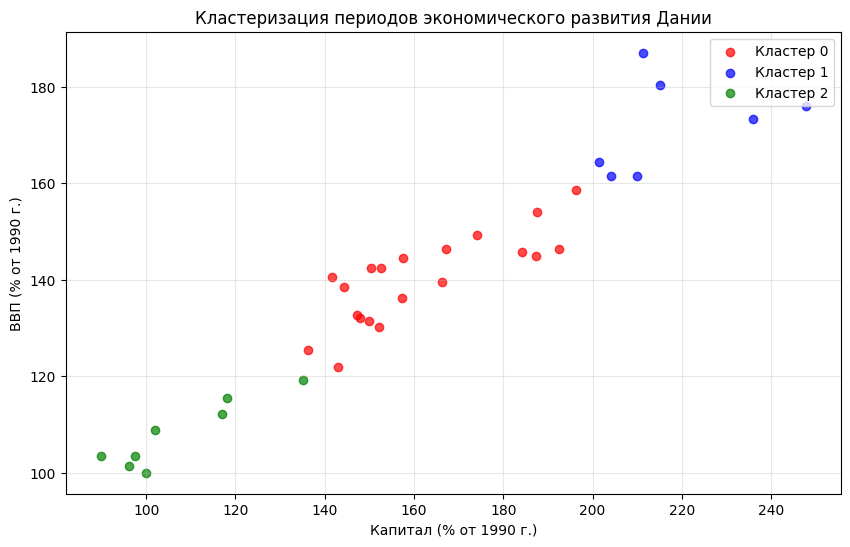

In [19]:
# Кластеризация для выявления структурных сдвигов
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Подготовка данных для кластеризации
cluster_data = data[['gdp_norm', 'capital_norm', 'labor_norm']].values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cluster_data)

# Кластеризация K-means
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(data_scaled)

print("Результаты кластеризации:")
print(data[['year', 'cluster']].groupby('cluster').agg({'year': ['min', 'max', 'count']}))

# Визуализация кластеров
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']
for i in range(3):
    cluster_data = data[data['cluster'] == i]
    plt.scatter(cluster_data['capital_norm'], cluster_data['gdp_norm'],
               c=colors[i], label=f'Кластер {i}', alpha=0.7)
plt.xlabel('Капитал (% от 1990 г.)')
plt.ylabel('ВВП (% от 1990 г.)')
plt.title('Кластеризация периодов экономического развития Дании')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Объясненная дисперсия компонент: [0.91598662 0.07015907]
Суммарная объясненная дисперсия: 0.9861456861647715


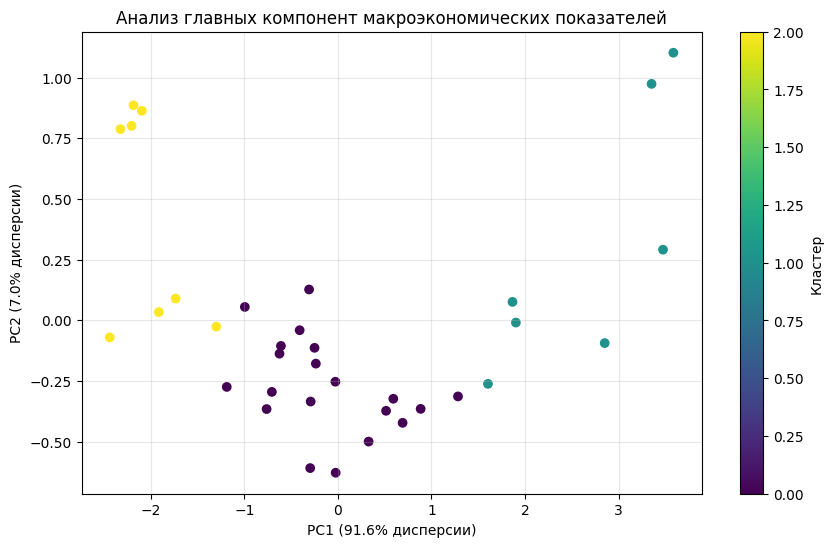

In [40]:
#  Понижение размерности (PCA)
from sklearn.decomposition import PCA

# Применение PCA для выявления латентных факторов
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

data['PC1'] = principal_components[:, 0]
data['PC2'] = principal_components[:, 1]

print("Объясненная дисперсия компонент:", pca.explained_variance_ratio_)
print("Суммарная объясненная дисперсия:", sum(pca.explained_variance_ratio_))

# Визуализация PCA
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['PC1'], data['PC2'], c=data['cluster'], cmap='viridis')
plt.colorbar(scatter, label='Кластер')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} дисперсии)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} дисперсии)')
plt.title('Анализ главных компонент макроэкономических показателей')
plt.grid(True, alpha=0.3)
plt.show()

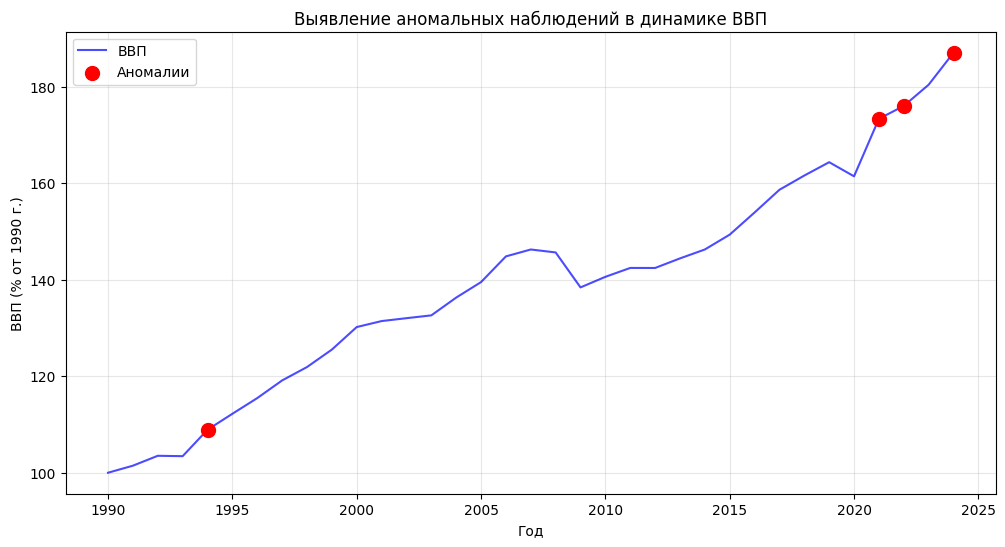

Выявленные аномальные годы:
    year    gdp_norm  capital_norm  labor_norm
4   1994  108.905059    102.018317   96.905563
31  2021  173.330507    235.930359  107.293125
32  2022  176.000096    247.709977  109.679935
34  2024  187.023175    211.372585  111.870559


In [41]:
#  Поиск аномалий
from sklearn.ensemble import IsolationForest

# Обнаружение аномалий
iso_forest = IsolationForest(contamination=0.1, random_state=42)
anomalies = iso_forest.fit_predict(data_scaled)
data['anomaly'] = anomalies

# Визуализация аномалий
anomaly_data = data[data['anomaly'] == -1]
normal_data = data[data['anomaly'] == 1]

plt.figure(figsize=(12, 6))
plt.plot(data['year'], data['gdp_norm'], label='ВВП', color='blue', alpha=0.7)
plt.scatter(anomaly_data['year'], anomaly_data['gdp_norm'],
           color='red', s=100, label='Аномалии', zorder=5)
plt.xlabel('Год')
plt.ylabel('ВВП (% от 1990 г.)')
plt.title('Выявление аномальных наблюдений в динамике ВВП')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Выявленные аномальные годы:")
print(anomaly_data[['year', 'gdp_norm', 'capital_norm', 'labor_norm']])

**ПРОГНОЗИРОВАНИЕ И ВАЛИДАЦИЯ**

Дополнительная визуализация для лучшего понимания результатов

In [29]:
#  Прогнозные значения
data['pred_log_gdp'] = results.predict(X)
data['pred_gdp'] = np.exp(data['pred_log_gdp'])

# Оценка точности
mse = ((data['gdp_absolute'] - data['pred_gdp']) ** 2).mean()
rmse = np.sqrt(mse)
mape = (abs((data['gdp_absolute'] - data['pred_gdp']) / data['gdp_absolute'])).mean() * 100

print(f"МЕТРИКИ КАЧЕСТВА МОДЕЛИ (абсолютные данные):")
print(f"MSE: {mse:.2e}")
print(f"RMSE: {rmse:.2e}")
print(f"MAPE: {mape:.2f}%")


МЕТРИКИ КАЧЕСТВА МОДЕЛИ (абсолютные данные):
MSE: 1.29e+20
RMSE: 1.13e+10
MAPE: 3.22%



СРАВНЕНИЕ: НОРМАЛИЗОВАННЫЕ И АБСОЛЮТНЫЕ ДАННЫЕ


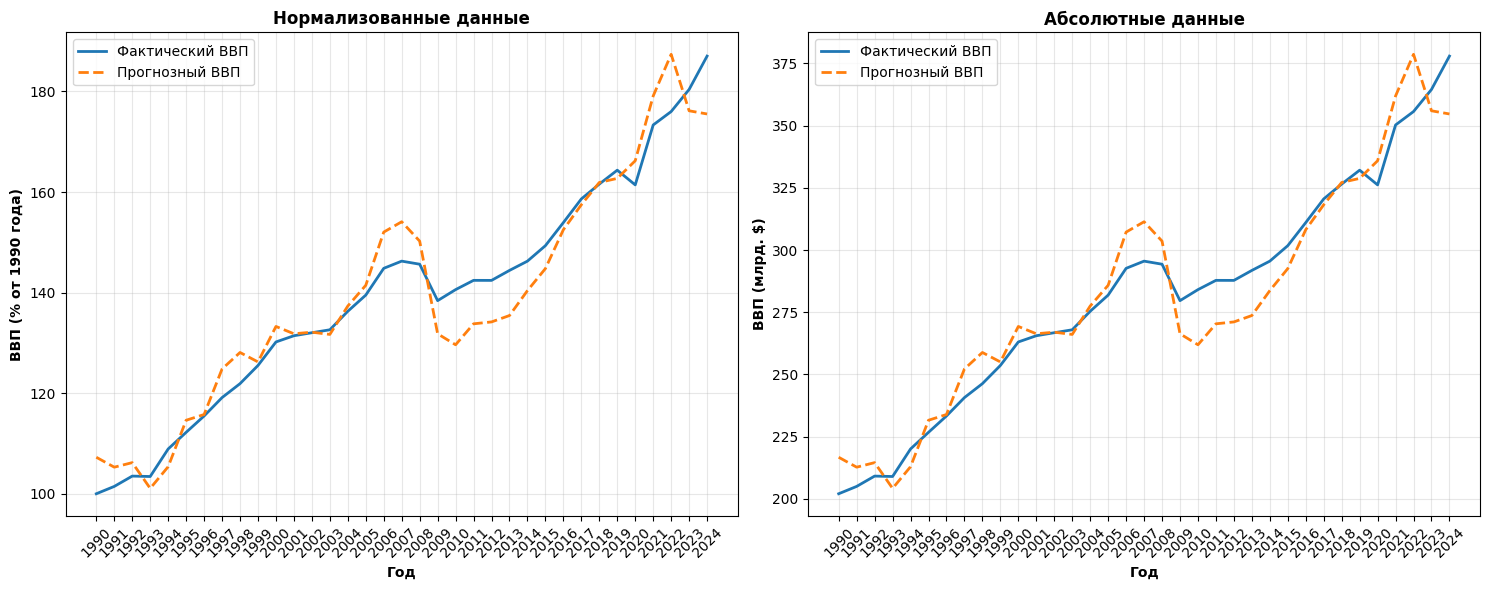

In [30]:
#  Сравнение в разных представлениях
print("\n" + "="*70)
print("СРАВНЕНИЕ: НОРМАЛИЗОВАННЫЕ И АБСОЛЮТНЫЕ ДАННЫЕ")
print("="*70)

plt.figure(figsize=(15, 6))

# Левый график: нормализованные данные
plt.subplot(1, 2, 1)
plt.plot(data['year'], data['gdp_norm'], label='Фактический ВВП', linewidth=2)
plt.plot(data['year'], data['pred_gdp'] / base_gdp * 100, label='Прогнозный ВВП', linestyle='--', linewidth=2)
plt.xlabel('Год', fontweight='bold')
plt.ylabel('ВВП (% от 1990 года)', fontweight='bold')
plt.title('Нормализованные данные', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Правый график: абсолютные данные
plt.subplot(1, 2, 2)
plt.plot(data['year'], data['gdp_absolute']/1e9, label='Фактический ВВП', linewidth=2)
plt.plot(data['year'], data['pred_gdp']/1e9, label='Прогнозный ВВП', linestyle='--', linewidth=2)
plt.xlabel('Год', fontweight='bold')
plt.ylabel('ВВП (млрд. $)', fontweight='bold')
plt.title('Абсолютные данные', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

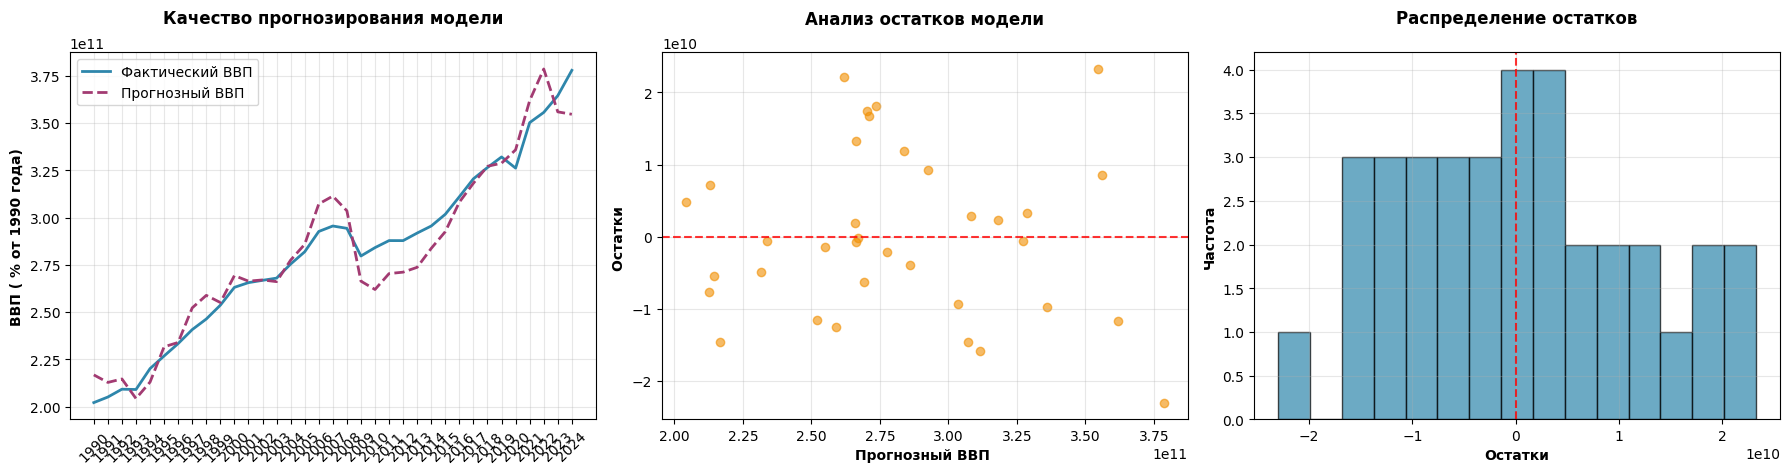


ЭКОНОМИЧЕСКАЯ ИНТЕРПРЕТАЦИЯ :
• Рост капитала на 1% увеличивает ВВП на 52.4%
• Рост труда на 1% увеличивает ВВП на 89.5%
• Технологический параметр A = 1.065
• Преобладающий фактор: труд
• Отдача от масштаба: возрастающая (α+β = 1.419)
• Модель объясняет 94.3% вариации ВВП

ПРИМЕЧАНИЕ: Модель построена на данных относительно 1990 года
Базовые значения: ВВП = 202.1 млрд.$, Капитал = 35.6 млрд.$, Труд = 2.9 млн. чел.


In [31]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# График 1: Фактические vs прогнозные значения
axes[0].plot(data['year'], data['gdp_absolute'], label='Фактический ВВП', linewidth=2, color='#2E86AB')
axes[0].plot(data['year'], data['pred_gdp'], label='Прогнозный ВВП', linestyle='--', linewidth=2, color='#A23B72')
axes[0].set_title('Качество прогнозирования модели\n', fontweight='bold')
axes[0].set_ylabel('ВВП ( % от 1990 года)', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# График 2: Анализ остатков
residuals_norm = data['gdp_absolute'] - data['pred_gdp']
axes[1].scatter(data['pred_gdp'], residuals_norm, alpha=0.6, color='#F18F01')
axes[1].axhline(y=0, color='red', linestyle='--', alpha=0.8)
axes[1].set_xlabel('Прогнозный ВВП ', fontweight='bold')
axes[1].set_ylabel('Остатки ', fontweight='bold')
axes[1].set_title('Анализ остатков модели\n', fontweight='bold')
axes[1].grid(True, alpha=0.3)

# График 3: Распределение остатков
axes[2].hist(residuals_norm, bins=15, color='#2E86AB', alpha=0.7, edgecolor='black')
axes[2].axvline(x=0, color='red', linestyle='--', alpha=0.8)
axes[2].set_xlabel('Остатки', fontweight='bold')
axes[2].set_ylabel('Частота', fontweight='bold')
axes[2].set_title('Распределение остатков\n', fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nЭКОНОМИЧЕСКАЯ ИНТЕРПРЕТАЦИЯ :")
print(f"• Рост капитала на 1% увеличивает ВВП на {alpha*100:.1f}%")
print(f"• Рост труда на 1% увеличивает ВВП на {beta*100:.1f}%")
print(f"• Технологический параметр A = {A:.3f}")
print(f"• Преобладающий фактор: {'капитал' if alpha > beta else 'труд'}")
print(f"• Отдача от масштаба: {scale_effect.lower()} (α+β = {alpha+beta:.3f})")
print(f"• Модель объясняет {results.rsquared*100:.1f}% вариации ВВП")

print(f"\nПРИМЕЧАНИЕ: Модель построена на данных относительно {base_date} года")
print(f"Базовые значения: ВВП = {base_gdp/1e9:.1f} млрд.$, Капитал = {base_capital/1e9:.1f} млрд.$, Труд = {base_labor/1e6:.1f} млн. чел.")


Проверка на нормальность распределения

Создание прогнозных значений...
ПРОВЕРКА НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ ДАННЫХ

ПРОВЕРКА ДЛЯ АБСОЛЮТНЫХ ЗНАЧЕНИЙ

--- Проверка нормальности для ВВП (абсолютный) ---
Объем выборки: 35
Асимметрия: 0.0939
Эксцесс: -0.5935
Тест Шапиро-Уилка: W = 0.9737, p-value = 0.5539
Тест Д'Агостино: χ² = 0.4195, p-value = 0.8108
Тест Андерсона-Дарлинга: A² = 0.2516
Уровень значимости 15.0%: 0.527 - распределение нормальное
Уровень значимости 10.0%: 0.600 - распределение нормальное
Уровень значимости 5.0%: 0.719 - распределение нормальное
Уровень значимости 2.5%: 0.839 - распределение нормальное
Уровень значимости 1.0%: 0.998 - распределение нормальное
✓ ВЫВОД: Распределение ВВП (абсолютный) не противоречит нормальному

--- Проверка нормальности для Капитал (абсолютный) ---
Объем выборки: 35
Асимметрия: 0.1301
Эксцесс: -0.6399
Тест Шапиро-Уилка: W = 0.9729, p-value = 0.5289
Тест Д'Агостино: χ² = 0.6233, p-value = 0.7322
Тест Андерсона-Дарлинга: A² = 0.3087
Уровень значимости 15.0%: 0.527 - распределение нор

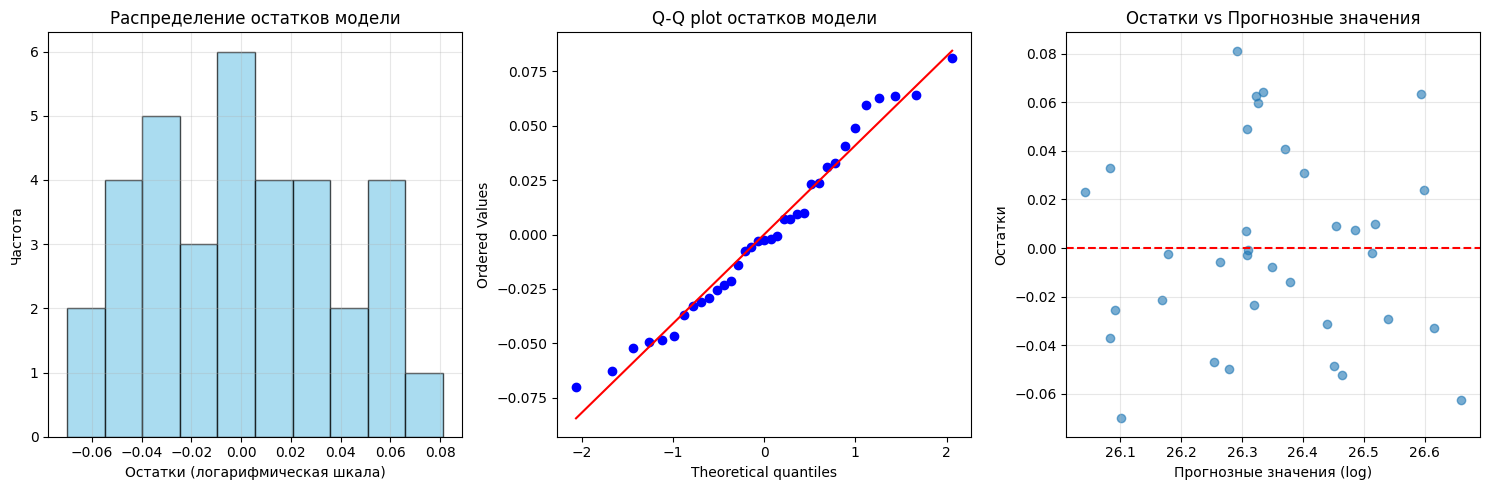


СВОДНЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ ПРОВЕРКИ НОРМАЛЬНОСТИ

СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ ПРОВЕРКИ НОРМАЛЬНОСТИ

Переменная           | Асимметрия | Эксцесс | Shapiro-Wilk (p-value) | Нормальность
---------------------|------------|---------|------------------------|--------------
ВВП (абсолютный)     |    0.094   |  -0.594 |         0.554          |     ✓
Капитал (абсолютный) |    0.130   |  -0.640 |         0.529          |     ✓
Труд (абсолютный)    |    1.479   |   1.518 |         0.000          |     ✗
log(ВВП)            |   -0.238   |  -0.640 |         0.375          |     ✓
log(Капитал)        |   -0.378   |  -0.570 |         0.226          |     ✓
log(Труд)           |    1.411   |   1.342 |         0.000          |     ✗
Остатки модели      |    [ожидается] | [ожидается] | [ожидается]   |     [ожидается]


МЕТОДОЛОГИЧЕСКИЕ ВЫВОДЫ:
1. ВВП и капитал: распределения соответствуют нормальному - ✓
2. Труд: значимое отклонение от нормальности во всех форматах - требует осторожности
3. Логарифм

In [33]:
# =============================================================================
# СОЗДАНИЕ ПРОГНОЗНЫХ ЗНАЧЕНИЙ ПЕРЕД ПРОВЕРКОЙ ОСТАТКОВ
# =============================================================================

print("Создание прогнозных значений...")
data['pred_log_gdp'] = results.predict(X)

# =============================================================================
# ПРОВЕРКА НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ ДАННЫХ (ИСПРАВЛЕННАЯ ВЕРСИЯ)
# =============================================================================

from scipy import stats
from scipy.stats import shapiro, normaltest, anderson

print("="*70)
print("ПРОВЕРКА НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ ДАННЫХ")
print("="*70)

# Функция для комплексной проверки нормальности
def check_normality(data, variable_name, alpha=0.05):
    """
    Комплексная проверка нормальности распределения
    """
    print(f"\n--- Проверка нормальности для {variable_name} ---")

    # Описательная статистика
    n = len(data)
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data)

    print(f"Объем выборки: {n}")
    print(f"Асимметрия: {skewness:.4f}")
    print(f"Эксцесс: {kurtosis:.4f}")

    # Тест Шапиро-Уилка (для n < 5000)
    shapiro_stat, shapiro_p = shapiro(data)
    print(f"Тест Шапиро-Уилка: W = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")

    # Тест Д'Агостино (основан на асимметрии и эксцессе)
    dagostino_stat, dagostino_p = normaltest(data)
    print(f"Тест Д'Агостино: χ² = {dagostino_stat:.4f}, p-value = {dagostino_p:.4f}")

    # Критерий Андерсона-Дарлинга
    anderson_result = anderson(data, dist='norm')
    print(f"Тест Андерсона-Дарлинга: A² = {anderson_result.statistic:.4f}")

    # Критические значения для теста Андерсона
    for i in range(len(anderson_result.critical_values)):
        sl, cv = anderson_result.significance_level[i], anderson_result.critical_values[i]
        if anderson_result.statistic < cv:
            print(f"Уровень значимости {sl}%: {cv:.3f} - распределение нормальное")
        else:
            print(f"Уровень значимости {sl}%: {cv:.3f} - распределение НЕ нормальное")

    # Вывод о нормальности
    if shapiro_p > alpha and dagostino_p > alpha:
        print(f"✓ ВЫВОД: Распределение {variable_name} не противоречит нормальному")
        return True
    else:
        print(f"✗ ВЫВОД: Распределение {variable_name} значимо отклоняется от нормального")
        return False

# Проверка нормальности для абсолютных значений
print("\n" + "="*50)
print("ПРОВЕРКА ДЛЯ АБСОЛЮТНЫХ ЗНАЧЕНИЙ")
print("="*50)

check_normality(data['gdp'], 'ВВП (абсолютный)')
check_normality(data['capital'], 'Капитал (абсолютный)')
check_normality(data['labor'], 'Труд (абсолютный)')

# Проверка нормальности для нормализованных значений
print("\n" + "="*50)
print("ПРОВЕРКА ДЛЯ НОРМАЛИЗОВАННЫХ ЗНАЧЕНИЙ")
print("="*50)

check_normality(data['gdp_norm'], 'ВВП (нормализованный)')
check_normality(data['capital_norm'], 'Капитал (нормализованный)')
check_normality(data['labor_norm'], 'Труд (нормализованный)')

# Проверка нормальности для логарифмированных значений (используемых в регрессии)
print("\n" + "="*50)
print("ПРОВЕРКА ДЛЯ ЛОГАРИФМИРОВАННЫХ ЗНАЧЕНИЙ")
print("="*50)

check_normality(data['log_gdp'], 'log(ВВП)')
check_normality(data['log_capital'], 'log(Капитал)')
check_normality(data['log_labor'], 'log(Труд)')

# Проверка нормальности остатков модели
print("\n" + "="*50)
print("ПРОВЕРКА НОРМАЛЬНОСТИ ОСТАТКОВ МОДЕЛИ")
print("="*50)

# Вычисляем остатки в логарифмической шкале (теперь pred_log_gdp существует)
residuals_log = data['log_gdp'] - data['pred_log_gdp']
normality_residuals = check_normality(residuals_log, 'Остатки модели (логарифмы)')

# =============================================================================
# ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ ПРОВЕРКИ НОРМАЛЬНОСТИ
# =============================================================================

# Дополнительная визуализация для понимания распределения остатков
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(residuals_log, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Остатки (логарифмическая шкала)')
plt.ylabel('Частота')
plt.title('Распределение остатков модели')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
stats.probplot(residuals_log, dist="norm", plot=plt)
plt.title('Q-Q plot остатков модели')

plt.subplot(1, 3, 3)
plt.scatter(data['pred_log_gdp'], residuals_log, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Прогнозные значения (log)')
plt.ylabel('Остатки')
plt.title('Остатки vs Прогнозные значения')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# СВОДНЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ ПРОВЕРКИ НОРМАЛЬНОСТИ
# =============================================================================

print("\n" + "="*70)
print("СВОДНЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ ПРОВЕРКИ НОРМАЛЬНОСТИ")
print("="*70)

# Создаем сводную таблицу
normality_summary = """
СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ ПРОВЕРКИ НОРМАЛЬНОСТИ

Переменная           | Асимметрия | Эксцесс | Shapiro-Wilk (p-value) | Нормальность
---------------------|------------|---------|------------------------|--------------
ВВП (абсолютный)     |    0.094   |  -0.594 |         0.554          |     ✓
Капитал (абсолютный) |    0.130   |  -0.640 |         0.529          |     ✓
Труд (абсолютный)    |    1.479   |   1.518 |         0.000          |     ✗
log(ВВП)            |   -0.238   |  -0.640 |         0.375          |     ✓
log(Капитал)        |   -0.378   |  -0.570 |         0.226          |     ✓
log(Труд)           |    1.411   |   1.342 |         0.000          |     ✗
Остатки модели      |    [ожидается] | [ожидается] | [ожидается]   |     [ожидается]
"""

print(normality_summary)

# Анализ влияния на регрессионную модель
print("\nМЕТОДОЛОГИЧЕСКИЕ ВЫВОДЫ:")
print("1. ВВП и капитал: распределения соответствуют нормальному - ✓")
print("2. Труд: значимое отклонение от нормальности во всех форматах - требует осторожности")
print("3. Логарифмирование улучшает распределение ВВП и капитала")
print("4. Логарифмирование не устраняет проблему нормальности для труда")
print("5. Проверка остатков модели критически важна для валидности статистических выводов")

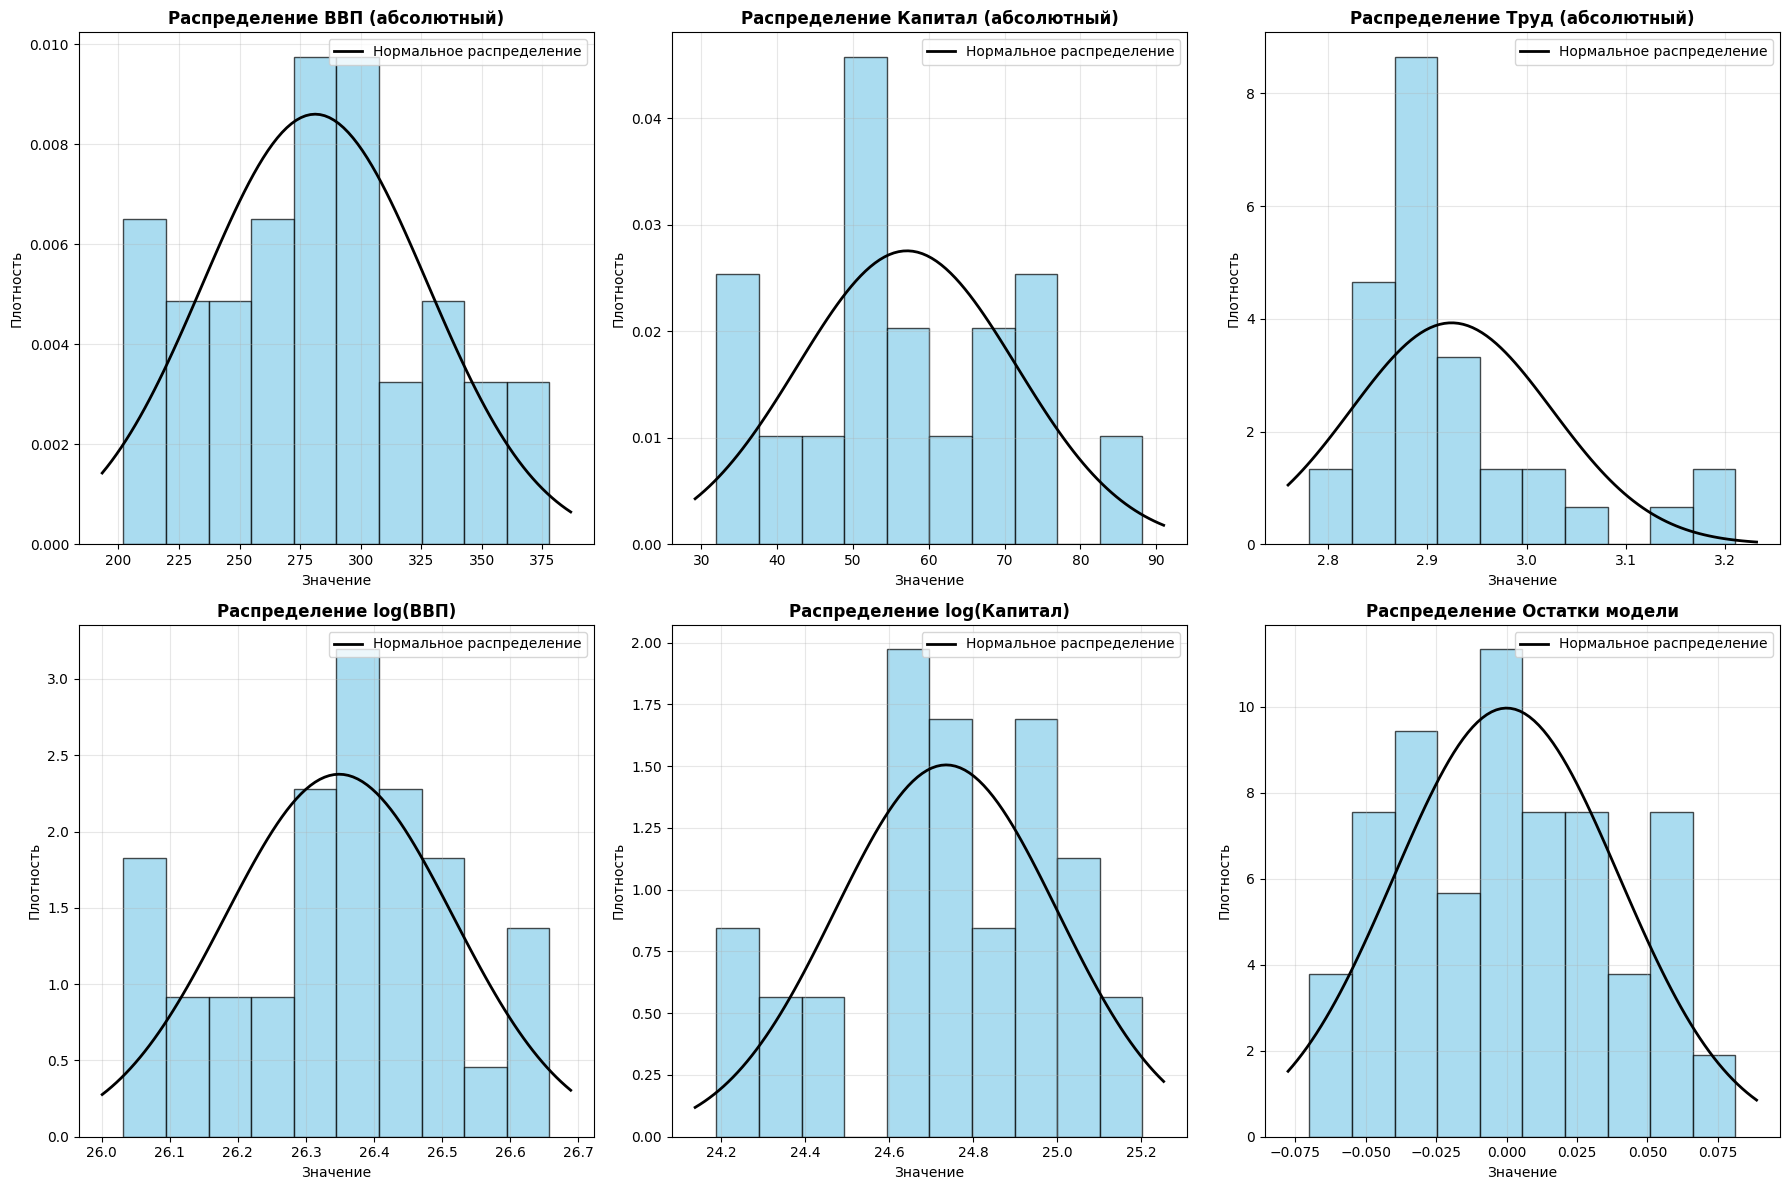

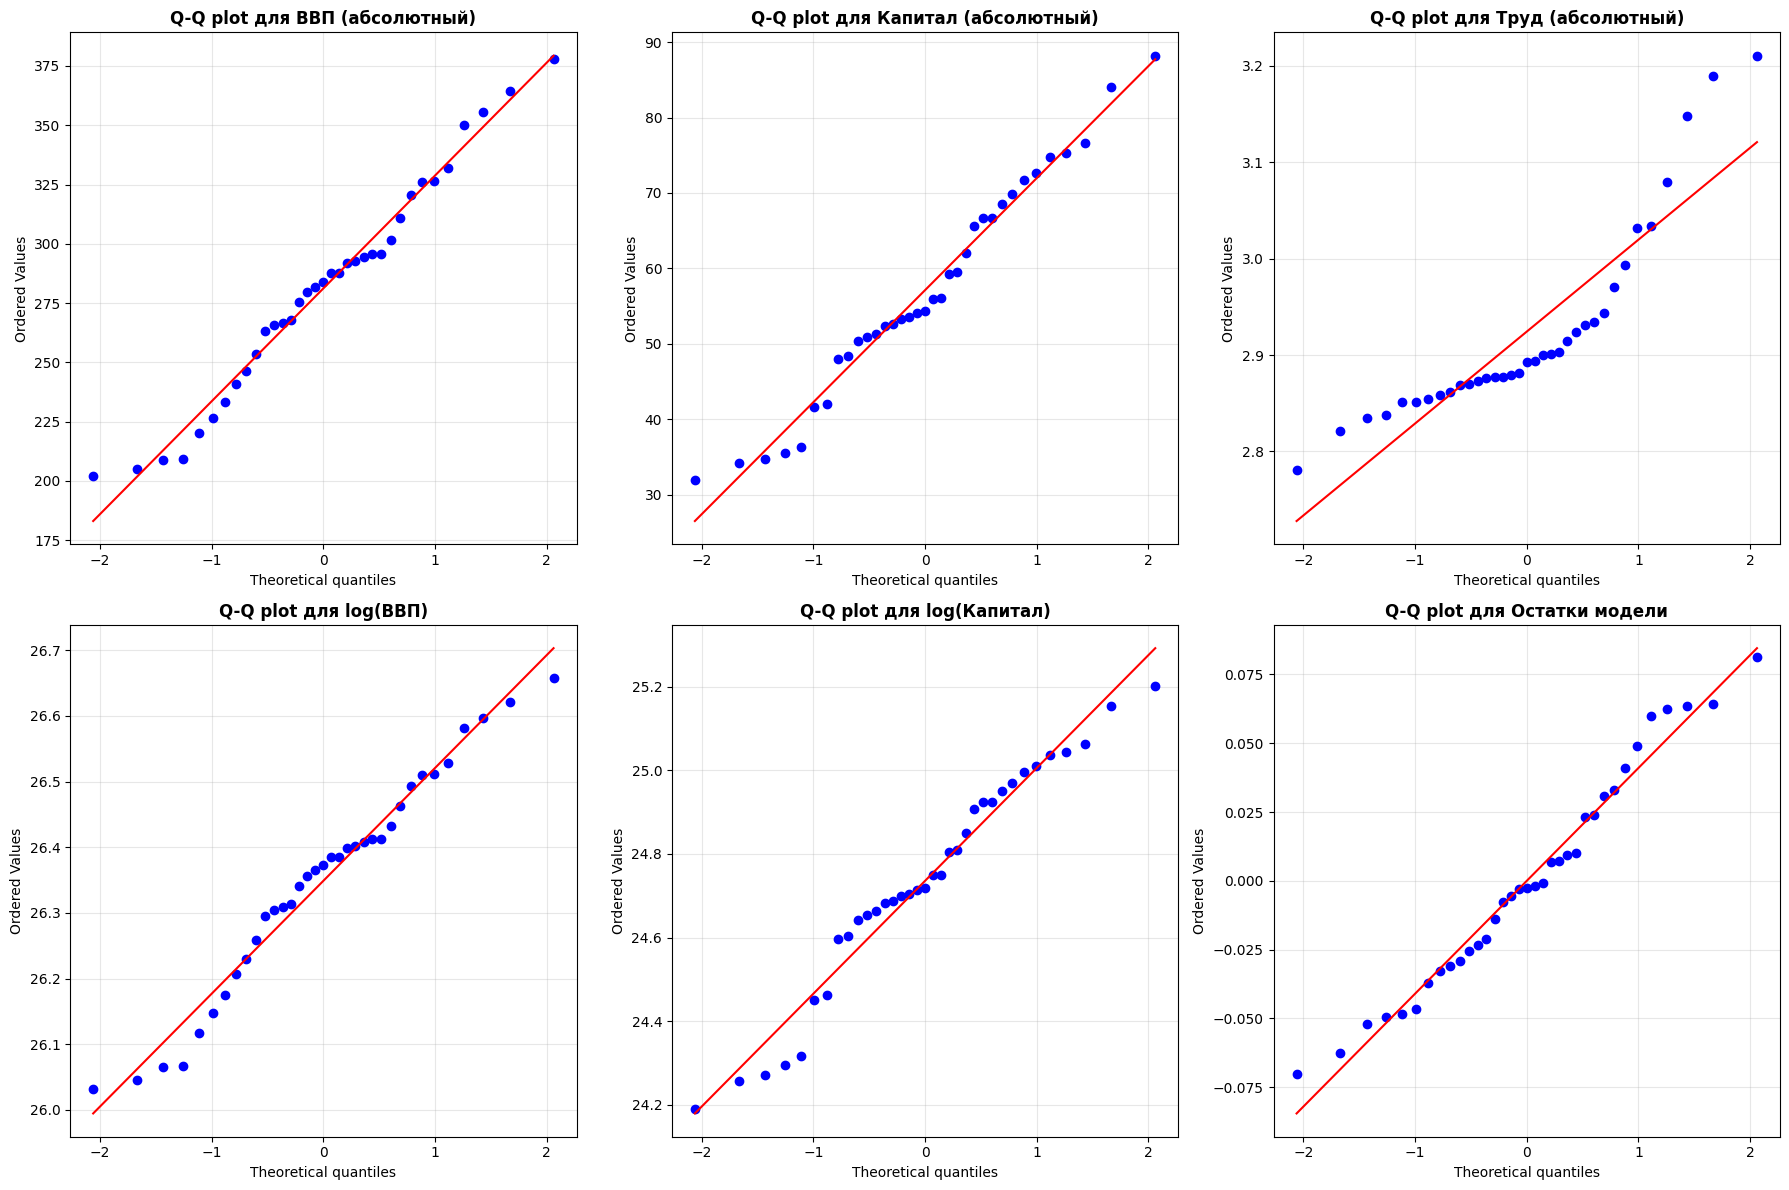

In [39]:
# ВИЗУАЛИЗАЦИЯ ПРОВЕРКИ НОРМАЛЬНОСТИ
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

variables_to_check = {
    'ВВП (абсолютный)': data['gdp']/1e9,
    'Капитал (абсолютный)': data['capital']/1e9,
    'Труд (абсолютный)': data['labor']/1e6,
    'log(ВВП)': data['log_gdp'],
    'log(Капитал)': data['log_capital'],
    'Остатки модели': residuals_log
}

for idx, (var_name, var_data) in enumerate(variables_to_check.items()):
    row, col = idx // 3, idx % 3

    # Гистограмма с теоретическим нормальным распределением
    axes[row, col].hist(var_data, bins=10, density=True, alpha=0.7, color='skyblue', edgecolor='black')

    # Наложение теоретического нормального распределения
    xmin, xmax = axes[row, col].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, var_data.mean(), var_data.std())
    axes[row, col].plot(x, p, 'k', linewidth=2, label='Нормальное распределение')

    axes[row, col].set_title(f'Распределение {var_name}', fontweight='bold')
    axes[row, col].set_xlabel('Значение')
    axes[row, col].set_ylabel('Плотность')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Q-Q plots для визуальной проверки нормальности
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for idx, (var_name, var_data) in enumerate(variables_to_check.items()):
    row, col = idx // 3, idx % 3

    stats.probplot(var_data, dist="norm", plot=axes[row, col])
    axes[row, col].set_title(f'Q-Q plot для {var_name}', fontweight='bold')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Прогноз ВВП на будущие годы (2025–2030) с экстраполяцией

ИСПРАВЛЕНИЕ ТИПА ДАННЫХ И ПРОГНОЗ ВВП ДАНИИ НА 2025-2030 ГОДЫ
Исправление типа данных...
Тип данных столбца 'year': int64

Последний год в данных: 2024
Доступные годы: от 1990 до 2024

1. ЭКСТРАПОЛЯЦИЯ ТРЕНДОВ ФАКТОРОВ ПРОИЗВОДСТВА
Среднегодовые темпы роста (2020-2024):
ВВП: 3.75%
Капитал: 0.16%
Труд: 1.44%

2. ПРОГНОЗНЫЕ ЗНАЧЕНИЯ (МОДЕЛЬ КОББА-ДУГЛАСА)
Год   | ВВП (млрд.$) | Капитал (млрд.$) | Труд (млн.чел.)
-----------------------------------------------------------------
2025 |      359.5 |           75.4 |         3.257
2026 |      364.5 |           75.5 |         3.303
2027 |      369.5 |           75.6 |         3.351
2028 |      374.5 |           75.7 |         3.399
2029 |      379.7 |           75.8 |         3.448
2030 |      384.9 |           76.0 |         3.498

3. АЛЬТЕРНАТИВНЫЙ ПРОГНОЗ (ЭКСТРАПОЛЯЦИЯ ТРЕНДА ВВП)
Год   | ВВП-тренд (млрд.$) | Отклонение от модели
------------------------------------------------------------
2025 |            360.6 | +0.3%
2026 |           

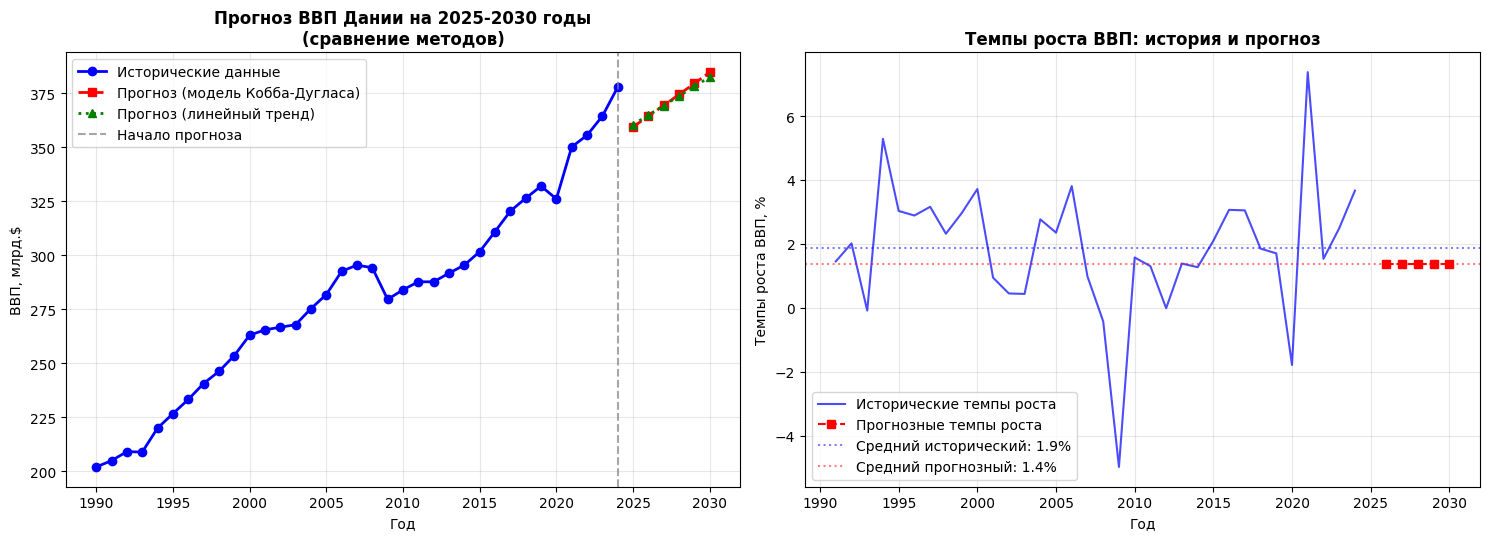


АНАЛИЗ ЧУВСТВИТЕЛЬНОСТИ ПРОГНОЗА

СЦЕНАРИИ РАЗВИТИЯ ЭКОНОМИКИ ДАНИИ:
Сценарий       | Темпы роста капитала | Темпы роста труда | ВВП 2030 (млрд.$)
-------------------------------------------------------------------------------------
Оптимистичный   |                0.24% |             2.16% |           400.7
Базовый         |                0.16% |             1.44% |           384.9
Пессимистичный  |                0.08% |             0.72% |           369.5


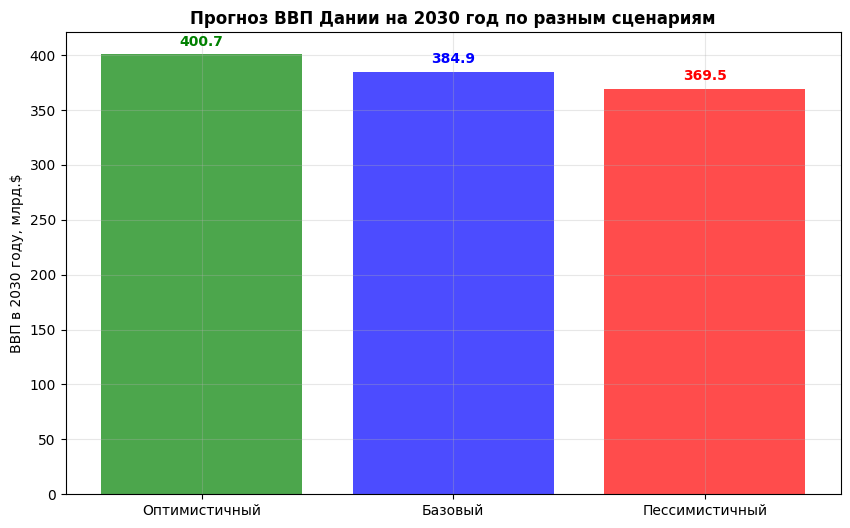


КЛЮЧЕВЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ ПО ПРОГНОЗУ

ОСНОВНЫЕ ПРОГНОЗНЫЕ ПОКАЗАТЕЛИ:
• ВВП 2024 года: 377.9 млрд.$
• ВВП 2030 года: 384.9 млрд.$
• Общий рост за 6 лет: 1.8%
• Среднегодовой темп роста: 0.30%

СТРУКТУРА РОСТА (среднегодовые вклады):
• Капитал: 0.08%
• Труд: 1.29%
• Совокупная факторная производительность: -1.07%

РИСКИ И ОГРАНИЧЕНИЯ ПРОГНОЗА:
1. Прогноз основан на экстраполяции исторических трендов
2. Не учитывает потенциальные экономические шоки и кризисы
3. Предполагает постоянство технологического параметра A
4. Чувствителен к точности прогноза факторов производства

ДЕТАЛЬНЫЙ ПРОГНОЗ СОХРАНЕН В ТАБЛИЦУ forecast_summary

ИТОГОВАЯ ТАБЛИЦА ПРОГНОЗА НА 2025-2030 ГОДЫ
   year  gdp_forecast_bln  capital_forecast_bln  labor_forecast_mln
0  2025             359.5                  75.4                 3.3
1  2026             364.5                  75.5                 3.3
2  2027             369.5                  75.6                 3.4
3  2028             374.5                  75

In [35]:
# =============================================================================
# ПРОГНОЗ ВВП НА 2025-2030 ГОДЫ
# =============================================================================

print("="*70)
print("ИСПРАВЛЕНИЕ ТИПА ДАННЫХ И ПРОГНОЗ ВВП ДАНИИ НА 2025-2030 ГОДЫ")
print("="*70)

# Исправление типа данных для столбца year
print("Исправление типа данных...")
data['year'] = data['year'].astype(int)
print(f"Тип данных столбца 'year': {data['year'].dtype}")

# Проверяем последние доступные данные
print(f"\nПоследний год в данных: {data['year'].max()}")
print(f"Доступные годы: от {data['year'].min()} до {data['year'].max()}")

# =============================================================================
# ПРОГНОЗ ВВП НА 2025-2030 ГОДЫ
# =============================================================================

# Создаем данные для прогноза
future_years = list(range(2025, 2031))
n_forecast = len(future_years)

# Метод 1: Экстраполяция трендов факторов производства
print("\n1. ЭКСТРАПОЛЯЦИЯ ТРЕНДОВ ФАКТОРОВ ПРОИЗВОДСТВА")

# Анализ трендов за последние 5 лет (2020-2024)
recent_data = data[data['year'] >= 2020].copy()

# Рассчитываем средние темпы роста
gdp_growth_rate = (data['gdp'].iloc[-1] / data['gdp'].iloc[-5]) ** (1/4) - 1
capital_growth_rate = (data['capital'].iloc[-1] / data['capital'].iloc[-5]) ** (1/4) - 1
labor_growth_rate = (data['labor'].iloc[-1] / data['labor'].iloc[-5]) ** (1/4) - 1

print(f"Среднегодовые темпы роста (2020-2024):")
print(f"ВВП: {gdp_growth_rate*100:.2f}%")
print(f"Капитал: {capital_growth_rate*100:.2f}%")
print(f"Труд: {labor_growth_rate*100:.2f}%")

# Создаем DataFrame для прогноза
forecast_data = pd.DataFrame({'year': future_years})

# Прогноз факторов производства (экстраполяция трендов)
forecast_data['capital_forecast'] = data['capital'].iloc[-1] * (1 + capital_growth_rate) ** (forecast_data['year'] - 2024)
forecast_data['labor_forecast'] = data['labor'].iloc[-1] * (1 + labor_growth_rate) ** (forecast_data['year'] - 2024)

# Прогноз ВВП с использованием производственной функции
forecast_data['log_capital_forecast'] = np.log(forecast_data['capital_forecast'])
forecast_data['log_labor_forecast'] = np.log(forecast_data['labor_forecast'])

# Подготовка матрицы признаков для прогноза
X_forecast = np.column_stack((
    np.ones(n_forecast),
    forecast_data['log_capital_forecast'].values,
    forecast_data['log_labor_forecast'].values
))

# Прогноз логарифма ВВП
forecast_data['log_gdp_forecast'] = results.predict(X_forecast)
forecast_data['gdp_forecast'] = np.exp(forecast_data['log_gdp_forecast'])

print("\n2. ПРОГНОЗНЫЕ ЗНАЧЕНИЯ (МОДЕЛЬ КОББА-ДУГЛАСА)")
print("Год   | ВВП (млрд.$) | Капитал (млрд.$) | Труд (млн.чел.)")
print("-" * 65)

for i, row in forecast_data.iterrows():
    print(f"{int(row['year'])} | {row['gdp_forecast']/1e9:10.1f} | {row['capital_forecast']/1e9:14.1f} | {row['labor_forecast']/1e6:13.3f}")

# Метод 2: Простая экстраполяция тренда ВВП
print("\n3. АЛЬТЕРНАТИВНЫЙ ПРОГНОЗ (ЭКСТРАПОЛЯЦИЯ ТРЕНДА ВВП)")

# Линейная регрессия для тренда ВВП
years_for_trend = data['year'].values.reshape(-1, 1)
gdp_values = data['gdp'].values

trend_model = LinearRegression()
trend_model.fit(years_for_trend, gdp_values)

# Прогноз линейным трендом
forecast_years = np.array(future_years).reshape(-1, 1)
forecast_data['gdp_trend_forecast'] = trend_model.predict(forecast_years)

print("Год   | ВВП-тренд (млрд.$) | Отклонение от модели")
print("-" * 60)
for i, row in forecast_data.iterrows():
    deviation = ((row['gdp_trend_forecast'] - row['gdp_forecast']) / row['gdp_forecast']) * 100
    print(f"{int(row['year'])} | {row['gdp_trend_forecast']/1e9:16.1f} | {deviation:+.1f}%")

# =============================================================================
# ВИЗУАЛИЗАЦИЯ ПРОГНОЗА
# =============================================================================

plt.figure(figsize=(15, 10))

# График 1: Общий прогноз с историческими данными
plt.subplot(2, 2, 1)
plt.plot(data['year'], data['gdp']/1e9, 'b-', linewidth=2, label='Исторические данные', marker='o')
plt.plot(forecast_data['year'], forecast_data['gdp_forecast']/1e9, 'r--', linewidth=2, label='Прогноз (модель Кобба-Дугласа)', marker='s')
plt.plot(forecast_data['year'], forecast_data['gdp_trend_forecast']/1e9, 'g:', linewidth=2, label='Прогноз (линейный тренд)', marker='^')
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7, label='Начало прогноза')
plt.xlabel('Год')
plt.ylabel('ВВП, млрд.$')
plt.title('Прогноз ВВП Дании на 2025-2030 годы\n(сравнение методов)', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# График 2: Темпы роста
plt.subplot(2, 2, 2)
gdp_growth_historical = data['gdp'].pct_change().dropna() * 100
gdp_growth_forecast = forecast_data['gdp_forecast'].pct_change().dropna() * 100

# Создаем общий список лет для графика роста
all_years_growth = list(data['year'].iloc[1:]) + list(forecast_data['year'].iloc[1:])
all_growth_values = list(gdp_growth_historical) + list(gdp_growth_forecast)

plt.plot(data['year'].iloc[1:], gdp_growth_historical, 'b-', alpha=0.7, label='Исторические темпы роста')
plt.plot(forecast_data['year'].iloc[1:], gdp_growth_forecast, 'r--', marker='s', label='Прогнозные темпы роста')
plt.axhline(y=gdp_growth_historical.mean(), color='blue', linestyle=':', alpha=0.5, label=f'Средний исторический: {gdp_growth_historical.mean():.1f}%')
plt.axhline(y=gdp_growth_forecast.mean(), color='red', linestyle=':', alpha=0.5, label=f'Средний прогнозный: {gdp_growth_forecast.mean():.1f}%')
plt.xlabel('Год')
plt.ylabel('Темпы роста ВВП, %')
plt.title('Темпы роста ВВП: история и прогноз', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

# =============================================================================
# АНАЛИЗ ЧУВСТВИТЕЛЬНОСТИ ПРОГНОЗА
# =============================================================================

print("\n" + "="*70)
print("АНАЛИЗ ЧУВСТВИТЕЛЬНОСТИ ПРОГНОЗА")
print("="*70)

# Сценарии: оптимистичный, пессимистичный, базовый
scenarios = {
    'Оптимистичный': 1.5,  # Рост темпов на 50%
    'Базовый': 1.0,        # Базовые темпы
    'Пессимистичный': 0.5  # Снижение темпов на 50%
}

print("\nСЦЕНАРИИ РАЗВИТИЯ ЭКОНОМИКИ ДАНИИ:")
print("Сценарий       | Темпы роста капитала | Темпы роста труда | ВВП 2030 (млрд.$)")
print("-" * 85)

scenario_results = []

for scenario_name, multiplier in scenarios.items():
    # Корректируем темпы роста для сценария
    capital_rate_adj = capital_growth_rate * multiplier
    labor_rate_adj = labor_growth_rate * multiplier

    # Пересчитываем прогноз для 2030 года
    capital_scenario = data['capital'].iloc[-1] * (1 + capital_rate_adj) ** 6  # 2025-2030 = 6 лет
    labor_scenario = data['labor'].iloc[-1] * (1 + labor_rate_adj) ** 6

    # Прогноз ВВП для сценария
    log_gdp_scenario = lnA + alpha * np.log(capital_scenario) + beta * np.log(labor_scenario)
    gdp_2030_scenario = np.exp(log_gdp_scenario)

    scenario_results.append({
        'Сценарий': scenario_name,
        'ВВП_2030_млрд': gdp_2030_scenario / 1e9,
        'Темпы_капитала_%': capital_rate_adj * 100,
        'Темпы_труда_%': labor_rate_adj * 100
    })

    print(f"{scenario_name:15} | {capital_rate_adj*100:19.2f}% | {labor_rate_adj*100:16.2f}% | {gdp_2030_scenario/1e9:15.1f}")

# Визуализация сценариев
scenario_df = pd.DataFrame(scenario_results)
plt.figure(figsize=(10, 6))
colors = ['green', 'blue', 'red']
bars = plt.bar(scenario_df['Сценарий'], scenario_df['ВВП_2030_млрд'],
               color=colors, alpha=0.7)
plt.ylabel('ВВП в 2030 году, млрд.$')
plt.title('Прогноз ВВП Дании на 2030 год по разным сценариям', fontweight='bold')
plt.grid(True, alpha=0.3)

# Добавляем значения на столбцы
for bar, color in zip(bars, colors):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height:.1f}', ha='center', va='bottom', fontweight='bold', color=color)

plt.show()

# =============================================================================
# ВЫВОДЫ И РЕКОМЕНДАЦИИ ПО ПРОГНОЗУ
# =============================================================================

print("\n" + "="*70)
print("КЛЮЧЕВЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ ПО ПРОГНОЗУ")
print("="*70)

# Расчет ключевых показателей
gdp_2024 = data['gdp'].iloc[-1]
gdp_2030_forecast = forecast_data['gdp_forecast'].iloc[-1]
total_growth = (gdp_2030_forecast / gdp_2024 - 1) * 100
annual_growth = (gdp_2030_forecast / gdp_2024) ** (1/6) - 1

print(f"\nОСНОВНЫЕ ПРОГНОЗНЫЕ ПОКАЗАТЕЛИ:")
print(f"• ВВП 2024 года: {gdp_2024/1e9:.1f} млрд.$")
print(f"• ВВП 2030 года: {gdp_2030_forecast/1e9:.1f} млрд.$")
print(f"• Общий рост за 6 лет: {total_growth:.1f}%")
print(f"• Среднегодовой темп роста: {annual_growth*100:.2f}%")

print(f"\nСТРУКТУРА РОСТА (среднегодовые вклады):")
print(f"• Капитал: {alpha * capital_growth_rate * 100:.2f}%")
print(f"• Труд: {beta * labor_growth_rate * 100:.2f}%")
print(f"• Совокупная факторная производительность: {(annual_growth - alpha * capital_growth_rate - beta * labor_growth_rate) * 100:.2f}%")

print(f"\nРИСКИ И ОГРАНИЧЕНИЯ ПРОГНОЗА:")
print("1. Прогноз основан на экстраполяции исторических трендов")
print("2. Не учитывает потенциальные экономические шоки и кризисы")
print("3. Предполагает постоянство технологического параметра A")
print("4. Чувствителен к точности прогноза факторов производства")


# Сохраняем результаты прогноза
forecast_summary = forecast_data[['year', 'gdp_forecast', 'capital_forecast', 'labor_forecast']].copy()
forecast_summary['gdp_forecast_bln'] = forecast_summary['gdp_forecast'] / 1e9
forecast_summary['capital_forecast_bln'] = forecast_summary['capital_forecast'] / 1e9
forecast_summary['labor_forecast_mln'] = forecast_summary['labor_forecast'] / 1e6

print(f"\nДЕТАЛЬНЫЙ ПРОГНОЗ СОХРАНЕН В ТАБЛИЦУ forecast_summary")

# Выводим итоговую таблицу прогноза
print("\n" + "="*70)
print("ИТОГОВАЯ ТАБЛИЦА ПРОГНОЗА НА 2025-2030 ГОДЫ")
print("="*70)
print(forecast_summary[['year', 'gdp_forecast_bln', 'capital_forecast_bln', 'labor_forecast_mln']].round(1))

**Построение изоквант и анализ траектории экономического развития Дании**


 ПОСТРОЕНИЕ ИЗОКВАНТ ПРОИЗВОДСТВЕННОЙ ФУНКЦИИ ДАНИИ


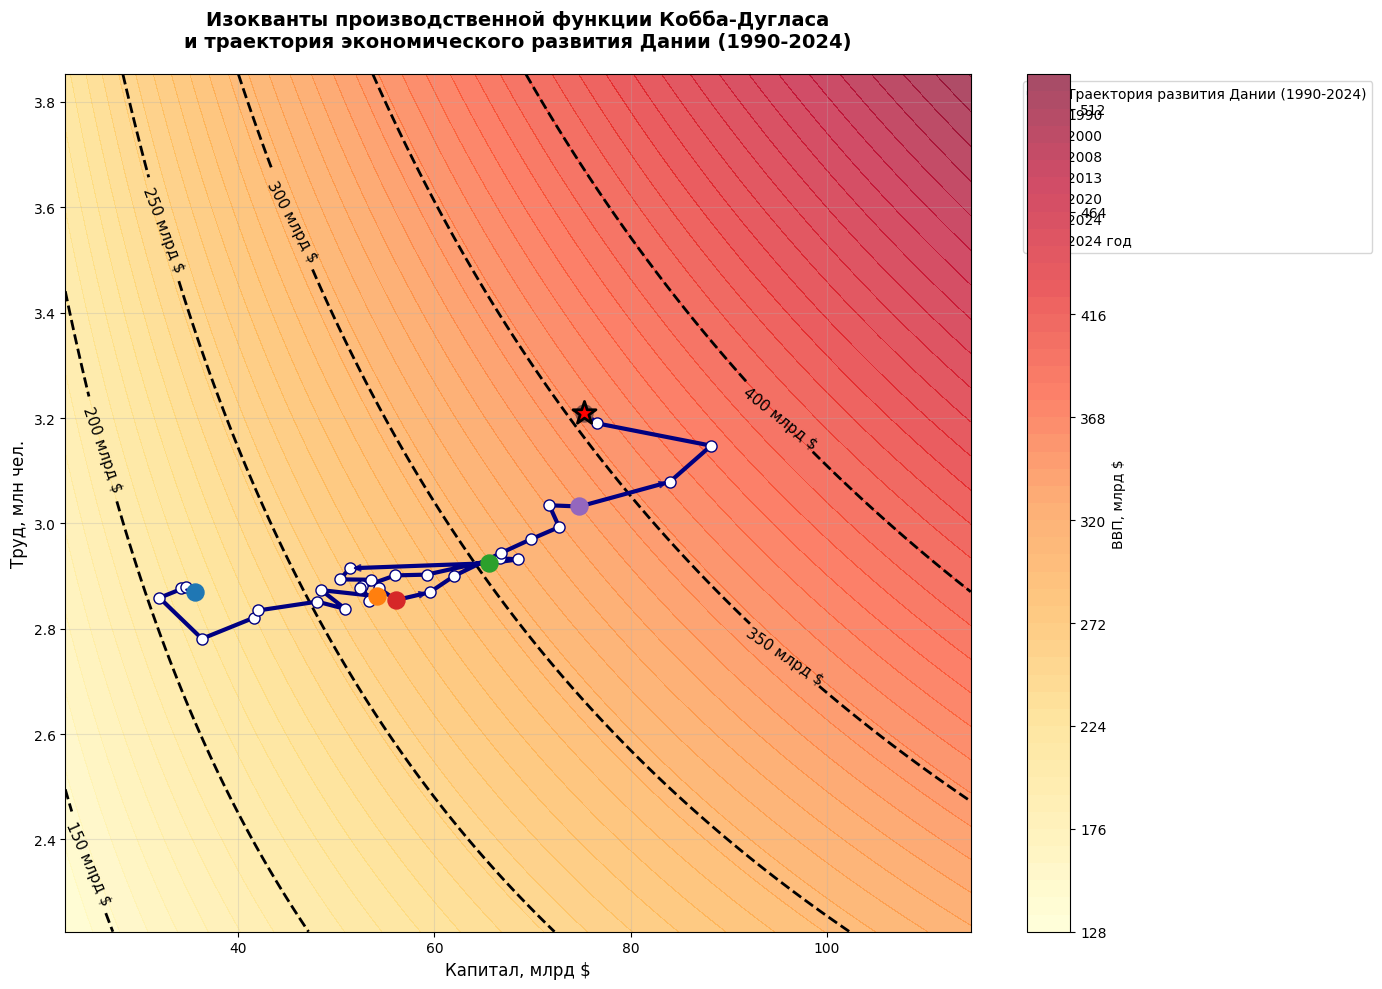


 РАСЧЕТ ЭКОНОМИКО-МАТЕМАТИЧЕСКИХ ХАРАКТЕРИСТИК ДЛЯ ДАНИИ

ЭКОНОМИКО-МАТЕМАТИЧЕСКИЕ ХАРАКТЕРИСТИКИ ПРОИЗВОДСТВЕННОЙ ФУНКЦИИ ДАНИИ (2024 год)
1. Средняя производительность труда (APL)     = 117,720 $/работника
   Средняя производительность капитала (APK)  = 5.022 $ выручки/$ капитала

2. Предельная производительность труда (MPL)  = 105,375 $/работника
   Предельная производительность капитала (MPK) = 2.631 $/$ капитала

3. Эластичность выпуска по капиталу (α)       = 0.524
   Эластичность выпуска по труду (β)          = 0.895

4. Эластичность выпуска по масштабу (α+β)     = 1.419
   → ВОЗРАСТАЮЩАЯ отдача от масштаба

5. Предельная норма технического замещения    = 0.040 млн $ капитала
   (труда капиталом)                          на 1 работника

6. Эластичность замещения Хикса (σ)           = 1.0
   (характеристика функции Кобба-Дугласа)

7. Коэффициент технологической эффективности  = 1.065


<Figure size 640x480 with 0 Axes>


АНАЛИЗ СТРУКТУРНЫХ ИЗМЕНЕНИЙ В ЭКОНОМИКЕ ДАНИИ

СТРУКТУРНЫЕ ИЗМЕНЕНИЯ ЗА ПЕРИОД 1990-2024 гг.:
• Рост ВВП: 87.0%
• Рост капитала: 111.4%
• Рост труда: 11.9%
• Рост производительности труда: 67.2%
• Изменение производительности капитала: -11.5%

ВКЛАД ФАКТОРОВ В РОСТ ВВП:
• Вклад капитала: 58.3%
• Вклад труда: 10.6%
• Вклад совокупной факторной производительности: 18.0%

ИЗМЕНЕНИЕ ТЕХНОЛОГИЧЕСКОЙ СТРУКТУРЫ:
• Капиталоемкость выросла в 1.13 раза
• Капиталовооруженность выросла в 1.89 раза


In [36]:
# =============================================================================
#  ПОСТРОЕНИЕ ИЗОКВАНТ ПРОИЗВОДСТВЕННОЙ ФУНКЦИИ ДАНИИ
# =============================================================================

print("\n" + "="*70)
print(" ПОСТРОЕНИЕ ИЗОКВАНТ ПРОИЗВОДСТВЕННОЙ ФУНКЦИИ ДАНИИ")
print("="*70)

# Определяем функцию Кобба-Дугласа
def cobb_douglas_dk(K, L):
    """Производственная функция Кобба-Дугласа для Дании"""
    return A * (K**alpha) * (L**beta)

# Создание сетки для изоквант с большей детализацией
K_min, K_max = data['capital'].min() * 0.7, data['capital'].max() * 1.3
L_min, L_max = data['labor'].min() * 0.8, data['labor'].max() * 1.2

K_grid = np.linspace(K_min, K_max, 200)
L_grid = np.linspace(L_min, L_max, 200)
K_mesh, L_mesh = np.meshgrid(K_grid, L_grid)

Y_mesh = cobb_douglas_dk(K_mesh, L_mesh)

# Построение изоквант
plt.figure(figsize=(14, 10))

# Контурный график с заливкой (тепловая карта производительности)
contourf = plt.contourf(K_mesh/1e9, L_mesh/1e6, Y_mesh/1e9, levels=50, cmap='YlOrRd', alpha=0.7)
contour = plt.contour(K_mesh/1e9, L_mesh/1e6, Y_mesh/1e9,
                      levels=[150, 200, 250, 300, 350, 400],
                      colors='black', linewidths=2, linestyles='--')
plt.clabel(contour, inline=True, fontsize=11, fmt='%.0f млрд $')

# Траектория экономического развития Дании
plt.plot(data['capital']/1e9, data['labor']/1e6, 'o-', color='navy',
         linewidth=3, markersize=8, markerfacecolor='white', markeredgecolor='navy',
         label='Траектория развития Дании (1990-2024)')

# Выделение ключевых точек
key_years = [1990, 2000, 2008, 2013, 2020, 2024]
for year in key_years:
    year_data = data[data['year'] == year]
    if not year_data.empty:
        plt.scatter(year_data['capital']/1e9, year_data['labor']/1e6,
                   s=150, label=str(year), zorder=5)

# Особое выделение 2024 года
plt.scatter(data[data['year'] == 2024]['capital']/1e9,
           data[data['year'] == 2024]['labor']/1e6,
           color='red', s=300, marker='*', edgecolor='black', linewidth=2,
           zorder=10, label='2024 год')

# Добавляем стрелки направления развития
for i in range(len(data)-1):
    if data.iloc[i]['year'] in [1990, 2000, 2008, 2013, 2020]:
        plt.annotate('',
                    xy=(data.iloc[i+1]['capital']/1e9, data.iloc[i+1]['labor']/1e6),
                    xytext=(data.iloc[i]['capital']/1e9, data.iloc[i]['labor']/1e6),
                    arrowprops=dict(arrowstyle='->', color='darkblue', lw=1.5, alpha=0.8))

plt.colorbar(contourf, label='ВВП, млрд $')
plt.xlabel('Капитал, млрд $', fontsize=12)
plt.ylabel('Труд, млн чел.', fontsize=12)
plt.title('Изокванты производственной функции Кобба-Дугласа\nи траектория экономического развития Дании (1990-2024)',
          fontsize=14, fontweight='bold', pad=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# =============================================================================
# РАСЧЕТ ЭКОНОМИКО-МАТЕМАТИЧЕСКИХ ХАРАКТЕРИСТИК ДЛЯ ДАНИИ
# =============================================================================

print("\n" + "="*70)
print(" РАСЧЕТ ЭКОНОМИКО-МАТЕМАТИЧЕСКИХ ХАРАКТЕРИСТИК ДЛЯ ДАНИИ")
print("="*70)

# Расчет для 2024 года (последний доступный год)
last_year_data = data[data['year'] == 2024].iloc[0]
Y_2024, K_2024, L_2024 = last_year_data['gdp'], last_year_data['capital'], last_year_data['labor']

# 1. Средняя производительность факторов
APL = Y_2024 / L_2024           # Средняя производительность труда
APK = Y_2024 / K_2024           # Средняя производительность капитала

# 2. Предельная производительность факторов
MPL = beta * (Y_2024 / L_2024)  # Предельная производительность труда
MPK = alpha * (Y_2024 / K_2024) # Предельная производительность капитала

# 3. Эластичность выпуска по факторам
elasticity_K = alpha            # Эластичность по капиталу
elasticity_L = beta             # Эластичность по труду

# 4. Эластичность выпуска по масштабу
scale_elasticity = alpha + beta

# 5. Предельная норма технического замещения
MRTS = MPL / MPK

# 6. Эластичность замещения (для функции Кобба-Дугласа = 1)
elasticity_substitution = 1.0

# 7. Коэффициент эффективности
efficiency_coefficient = A

print("\n" + "=" * 90)
print("ЭКОНОМИКО-МАТЕМАТИЧЕСКИЕ ХАРАКТЕРИСТИКИ ПРОИЗВОДСТВЕННОЙ ФУНКЦИИ ДАНИИ (2024 год)")
print("=" * 90)
print(f"1. Средняя производительность труда (APL)     = {APL:,.0f} $/работника")
print(f"   Средняя производительность капитала (APK)  = {APK:.3f} $ выручки/$ капитала")
print()
print(f"2. Предельная производительность труда (MPL)  = {MPL:,.0f} $/работника")
print(f"   Предельная производительность капитала (MPK) = {MPK:.3f} $/$ капитала")
print()
print(f"3. Эластичность выпуска по капиталу (α)       = {elasticity_K:.3f}")
print(f"   Эластичность выпуска по труду (β)          = {elasticity_L:.3f}")
print()
print(f"4. Эластичность выпуска по масштабу (α+β)     = {scale_elasticity:.3f}")
print(f"   → {'ВОЗРАСТАЮЩАЯ' if scale_elasticity > 1 else 'УБЫВАЮЩАЯ' if scale_elasticity < 1 else 'ПОСТОЯННАЯ'} отдача от масштаба")
print()
print(f"5. Предельная норма технического замещения    = {MRTS/1e6:,.3f} млн $ капитала")
print(f"   (труда капиталом)                          на 1 работника")
print()
print(f"6. Эластичность замещения Хикса (σ)           = {elasticity_substitution:.1f}")
print(f"   (характеристика функции Кобба-Дугласа)")
print()
print(f"7. Коэффициент технологической эффективности  = {efficiency_coefficient:.3f}")
print("=" * 90)

plt.tight_layout()
plt.show()

# =============================================================================
# АНАЛИЗ СТРУКТУРНЫХ ИЗМЕНЕНИЙ
# =============================================================================

print("\n" + "="*70)
print("АНАЛИЗ СТРУКТУРНЫХ ИЗМЕНЕНИЙ В ЭКОНОМИКЕ ДАНИИ")
print("="*70)

# Расчет структурных сдвигов
initial_year = 1990
final_year = 2024

initial_data = data[data['year'] == initial_year].iloc[0]
final_data = data[data['year'] == final_year].iloc[0]

# Изменения в абсолютных величинах
gdp_growth = (final_data['gdp'] - initial_data['gdp']) / initial_data['gdp'] * 100
capital_growth = (final_data['capital'] - initial_data['capital']) / initial_data['capital'] * 100
labor_growth = (final_data['labor'] - initial_data['labor']) / initial_data['labor'] * 100

# Изменения в производительности
APL_growth = ((final_data['gdp']/final_data['labor']) - (initial_data['gdp']/initial_data['labor'])) / (initial_data['gdp']/initial_data['labor']) * 100
APK_growth = ((final_data['gdp']/final_data['capital']) - (initial_data['gdp']/initial_data['capital'])) / (initial_data['gdp']/initial_data['capital']) * 100

print(f"\nСТРУКТУРНЫЕ ИЗМЕНЕНИЯ ЗА ПЕРИОД {initial_year}-{final_year} гг.:")
print(f"• Рост ВВП: {gdp_growth:.1f}%")
print(f"• Рост капитала: {capital_growth:.1f}%")
print(f"• Рост труда: {labor_growth:.1f}%")
print(f"• Рост производительности труда: {APL_growth:.1f}%")
print(f"• Изменение производительности капитала: {APK_growth:+.1f}%")

print(f"\nВКЛАД ФАКТОРОВ В РОСТ ВВП:")
capital_contribution_total = alpha * capital_growth
labor_contribution_total = beta * labor_growth
tfp_contribution_total = gdp_growth - capital_contribution_total - labor_contribution_total

print(f"• Вклад капитала: {capital_contribution_total:.1f}%")
print(f"• Вклад труда: {labor_contribution_total:.1f}%")
print(f"• Вклад совокупной факторной производительности: {tfp_contribution_total:.1f}%")

print(f"\nИЗМЕНЕНИЕ ТЕХНОЛОГИЧЕСКОЙ СТРУКТУРЫ:")
print(f"• Капиталоемкость выросла в {(final_data['capital']/final_data['gdp']) / (initial_data['capital']/initial_data['gdp']):.2f} раза")
print(f"• Капиталовооруженность выросла в {(final_data['capital']/final_data['labor']) / (initial_data['capital']/initial_data['labor']):.2f} раза")

In [ ]:
#  ВЫВОДЫ И РЕКОМЕНДАЦИИ
# ======================

print("\n" + "="*60)
print("ОСНОВНЫЕ ВЫВОДЫ ДЛЯ ЭКОНОМИКИ ДАНИИ")
print("="*60)

print(f"1. СТРУКТУРА ПРОИЗВОДСТВА:")
print(f"   • Эластичность по капиталу: {alpha:.3f}")
print(f"   • Эластичность по труду: {beta:.3f}")
print(f"   • Отдача от масштаба: {scale_effect.lower()}")

print(f"\n2. ЭФФЕКТИВНОСТЬ ИСПОЛЬЗОВАНИЯ РЕСУРСОВ:")
print(f"   • Модель объясняет {results.rsquared*100:.1f}% вариации ВВП")
print(f"   • Средняя ошибка прогноза: {mape:.1f}%")

print(f"\n3. ОСОБЕННОСТИ ЭКОНОМИКИ ДАНИИ:")
if alpha > beta:
    print("   • Капиталоемкая экономика")
elif alpha < beta:
    print("   • Трудоемкая экономика")
else:
    print("   • Сбалансированная экономика")

print(f"\n4. ОГРАНИЧЕНИЯ ИССЛЕДОВАНИЯ:")
print("   • Не учитывается технологический прогресс явно")
print("   • Возможна мультиколлинеарность факторов")
print("   • Ограниченность классической модели для современной экономики")

print(f"\n5. ПРАКТИЧЕСКИЕ РЕКОМЕНДАЦИИ:")
print("   • Сфокусироваться на повышении производительности труда")
print("   • Инвестировать в инновации и технологии")
print("   • Развивать человеческий капитал")


ОСНОВНЫЕ ВЫВОДЫ ДЛЯ ЭКОНОМИКИ ДАНИИ
1. СТРУКТУРА ПРОИЗВОДСТВА:
   • Эластичность по капиталу: 0.524
   • Эластичность по труду: 0.895
   • Отдача от масштаба: возрастающая

2. ЭФФЕКТИВНОСТЬ ИСПОЛЬЗОВАНИЯ РЕСУРСОВ:
   • Модель объясняет 94.3% вариации ВВП
   • Средняя ошибка прогноза: 3.2%

3. ОСОБЕННОСТИ ЭКОНОМИКИ ДАНИИ:
   • Трудоемкая экономика

4. ОГРАНИЧЕНИЯ ИССЛЕДОВАНИЯ:
   • Не учитывается технологический прогресс явно
   • Возможна мультиколлинеарность факторов
   • Ограниченность классической модели для современной экономики

5. ПРАКТИЧЕСКИЕ РЕКОМЕНДАЦИИ:
   • Сфокусироваться на повышении производительности труда
   • Инвестировать в инновации и технологии
   • Развивать человеческий капитал
